# DS 7331 Lab 1: Visualization and Data Preprocessing

## Business Understanding:
#### *Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.*

We used the Census-Income data set from the UCI's machine learning repository. It contains 32,561 records with 15 demographic and employment related attributes. The data was collected between 1994 and 1995 via the Current Population Surveys conducted by the U.S. Census Bureau. Given that 2020 is also a Census year, we felt this would be a relevant data set to gain historical context, especially with regards to income.

The purpose of the data set is to determine which characteristics of a person's demographics and employment serve as the best predictors of that person's income, specifically, whether or not the make more than $50,000 per year.

A good prediction algorithm would establish the relationship between a group of attributes and the probability that a person makes more than $50,000 per year. We will evaluate this based on the misclassification rate of the algorithm.

The code below imports the various libraries we will need for this analysis.

In [87]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

This code imports the data.

In [43]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/adult.data'

This code imports the column headings for the table.

In [44]:
raw_census_95_data_names = ['age', 'workclass', 'fnlwght', 'education', 'education_num_yr', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'cap_gain', 'cap_loss', 'hours_per_week', 'native_country', 'annual_income']

This creates the data table by combining the data and the column headers.

In [45]:
raw_census_95_data = pd.read_csv(raw_data_url, names = raw_census_95_data_names)

We confirm that we correctly created our data table by displaying the first 5 rows of the table.

In [46]:
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Understanding:
#### *Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.*

As previously stated, this data set contains 32,561 rows and 15 columns. We confirm this here.

In [47]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
raw_census_95_data.shape

(32561, 15)

Below is a sample of these columns, demonstrating the various attributes we know about each person (row) within the data set.

In [48]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notna.html
raw_census_95_data[raw_census_95_data.notna()==True]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We confirm the data types of each attribute below. The data contains six continuous variables labeled *int64*, and nine categorical variables labeled *object*.

In [49]:
raw_census_95_data.dtypes

age                  int64
workclass           object
fnlwght              int64
education           object
education_num_yr     int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
cap_gain             int64
cap_loss             int64
hours_per_week       int64
native_country      object
annual_income       object
dtype: object

Below you will see the summary statistics for all continuous variables within this data set.

The initial metric that stands out is fnlwght is on a completely different scale than any other continuous variables. This particular variable was inserted by the Census as a way to combat the challenges that arise from stratified sampling, however the data set does not go into detail as to how this was calculated.

Additionally, we see a heavy right skew for cap_gain and cap_loss, as the respective means (1077.65 and 87.30) are much higher than the respective medians of 0.

Variables like age, education_num_yr, and hours_per_week are more uniformly distributed, with means and medians very close to each other.

In [50]:
raw_census_95_data.describe()

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We confirm the nine categorical variables labeled *object* below.

In [51]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'annual_income']


Below is an example of the levels of the categorical variable *workclass*. We deal with the different levels of these types of variables later in the notebook.

In [52]:
raw_census_95_data.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

## Verify data quality:
#### *Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.*

One of the first things we noticed was white space in the column names. The code below removes that white space.

In [53]:
#We see there is a lot of white space with some of the columns 
for col in catagorical_vars: 
    raw_census_95_data[col] = raw_census_95_data[col].str.strip()
    
del(catagorical_vars[-1])
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


We also noticed two levels of *native_country* labeled the "Hong" and "South". We opted to remove these obersvations, as we do not know definitively which countries these levels refer to, and it was a very small subset of our data set (100 observations).

In [54]:
#We see there are not many observations with native country of "Hong" and "South" we should consider removing these observations as we cannot group to a continent
pd.crosstab(raw_census_95_data.native_country.isin(['Hong', 'South']), raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
False,24642,7819
True,78,22


In [55]:
raw_census_95_data = raw_census_95_data[~raw_census_95_data.native_country.isin(['Hong', 'South'])]

Our initial investigation into missing values indicated that there were zero null values in this data set. However, we found that this was actually not a good indication of missing values.

In [56]:
raw_census_95_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32461 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32461 non-null  int64 
 1   workclass         32461 non-null  object
 2   fnlwght           32461 non-null  int64 
 3   education         32461 non-null  object
 4   education_num_yr  32461 non-null  int64 
 5   marital_status    32461 non-null  object
 6   occupation        32461 non-null  object
 7   relationship      32461 non-null  object
 8   race              32461 non-null  object
 9   sex               32461 non-null  object
 10  cap_gain          32461 non-null  int64 
 11  cap_loss          32461 non-null  int64 
 12  hours_per_week    32461 non-null  int64 
 13  native_country    32461 non-null  object
 14  annual_income     32461 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


As we can clearly see below. The missing values in this data set are marked by '?' rather than a null value. Based on this information, we must determine where the '?' values come from and how to handle them.

In [57]:
#https://docs.python.org/3.4/library/stdtypes.html#typesmapping
#https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
#we see there are a fair amount of missing values in the features denoted by '?'. 
miss_cat_vars = {}
for var in catagorical_vars: 
    k,v = var,raw_census_95_data[var].unique()
    miss_cat_vars.update({k : v})
miss_cat_vars

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'Self-emp-inc', '?', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object),
 'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'Protective-serv', '?', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'relationship': array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
  

We see missing values in *workclass*, *occupation* and *native_country*.

In [58]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
pd.crosstab(raw_census_95_data.workclass, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
workclass,,
?,1637,189
Federal-gov,589,370
Local-gov,1476,616
Never-worked,7,0
Private,17685,4952
Self-emp-inc,489,620
Self-emp-not-inc,1802,719
State-gov,943,353
Without-pay,14,0


In [59]:
pd.crosstab(raw_census_95_data.occupation, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
occupation,,
?,1644,189
Adm-clerical,3258,506
Armed-Forces,8,1
Craft-repair,3160,927
Exec-managerial,2089,1962
Farming-fishing,878,115
Handlers-cleaners,1282,86
Machine-op-inspct,1748,250
Other-service,3148,136


In [60]:
pd.crosstab(raw_census_95_data.native_country, raw_census_95_data.annual_income)

annual_income,<=50K,>50K
native_country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


As we are not sure of the "?" values. We dicussed using an imputation of the mode for *workclass*, *occupation* and *native_country*, but looking at the modes, we noticed that the proportions of the overall class and the '?' value do not match the proportions for the mode of that attribute. The code below shows the mode for each of these three attributes.

In [61]:
print(raw_census_95_data.workclass.mode(),\
raw_census_95_data.native_country.mode(),\
raw_census_95_data.occupation.mode()
     )

0    Private
dtype: object 0    United-States
dtype: object 0    Prof-specialty
dtype: object


For example, the proportion of <=50K is 90% and >50K is 10% in the "?" class of the *workclass* feature, vs 78% <50K and 22% for >50K in the mode of *workclass*, Private.

In [62]:
#https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.workclass).apply(lambda x: x/x.sum(), axis=1)

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
annual_income,,,,,,,,,
<=50K,0.066431,0.023902,0.059898,0.000284,0.717677,0.019844,0.073127,0.038268,0.000568
>50K,0.024172,0.047321,0.078782,0.000000,0.633329,0.079294,0.091955,0.045146,0.000000


We also see a similiar occurance with *occupation*, where the proportion of <=50K and >50K is 90% and 10% for the "?" class while the mode, "Prof-Specialty" is 55% for <= 50K and 45% for >50K.

In [63]:
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.occupation).apply(lambda x: x/x.sum(), axis=1)

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
annual_income,,,,,,,,,,,,,,,
<=50K,0.066715,0.132213,0.000325,0.128236,0.084774,0.035630,0.052025,0.070936,0.127749,0.006006,0.092119,0.017775,0.107581,0.026134,0.051782
>50K,0.024172,0.064714,0.000128,0.118557,0.250927,0.014708,0.010999,0.031973,0.017394,0.000128,0.237115,0.026858,0.125208,0.036194,0.040926


The only attribute where proportions are relatively close is *native_country* of "United States" and the "?" class at both classes being roughly even at 75% for <= 50K and 25% for >50K.

In [64]:
pd.crosstab(raw_census_95_data.annual_income,raw_census_95_data.native_country).apply(lambda x: x/x.sum(), axis=1)

native_country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Poland,Portugal,Puerto-Rico,Scotland,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
annual_income,,,,,,,,,,,,,,,,,,,,,
<=50K,0.017734,0.000487,0.003328,0.002232,0.002313,0.002841,0.002760,0.000974,0.003936,0.002435,...,0.001948,0.001339,0.004139,0.000365,0.001258,0.000609,0.000690,0.892744,0.002516,0.000406
>50K,0.018672,0.000895,0.004988,0.002558,0.000256,0.003197,0.000256,0.000512,0.001151,0.003837,...,0.001535,0.000512,0.001535,0.000384,0.002558,0.000384,0.000256,0.917125,0.000639,0.000767


We also see these missing observations comprise of just under 2400 observations. This makes up less than 10% of the entire dataset, excluding these observations is relatively low risk. 

For these reasons we will exclude the "?" labels from further analysis.

We found no outliers in our continuous variables. However, we did find an interesting "outlier" in the categorical variable *education*. There are 44 records classified as Preschool for *education*, but hold jobs in *workclass* that are unexpected. There is no reason to exclude these records, as it is not unreasonable for these individuals to have had alternative schooling.

In [65]:
raw_census_95_data[raw_census_95_data.education == 'Preschool']

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income
224,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
932,51,Local-gov,241843,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
2884,71,Private,235079,Preschool,1,Widowed,Craft-repair,Unmarried,Black,Male,0,0,10,United-States,<=50K
2946,31,Private,452405,Preschool,1,Never-married,Other-service,Other-relative,White,Female,0,0,35,Mexico,<=50K
3446,33,Private,239781,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,Mexico,<=50K
3592,39,?,362685,Preschool,1,Widowed,?,Not-in-family,White,Female,0,0,20,El-Salvador,<=50K
4107,52,Private,416129,Preschool,1,Married-civ-spouse,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
6433,27,Private,211032,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,41310,0,24,Mexico,<=50K
6864,54,Private,286989,Preschool,1,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
7070,30,Private,193598,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,Mexico,<=50K


## Other Features That Could Be Added:
#### *Are there other features that could be added to the data or created from existing features? Which ones?*

Initially we noticed that there were a lot of levels to the attribute *native_country*. Because we believe this would be difficult to handle in a model, we opted to map each of these levels to an attribute called *origin_descent* which segments these countries into their given continent/region.

In [66]:
continent_dict = {'United-States': 'United States', 'Cuba': 'Carib', 'Jamaica' : 'Carib', 'India' : 'Asia', \
                  'Mexico': 'North America', 'Puerto-Rico' : 'North America', 'Honduras' : 'Central America',\
                 'England' : 'Europe', 'Canada' : 'North America', 'Germany' : 'Europe', 'Cambodia': 'Asia',\
                 'Thailand' : 'Asia', 'Ecuador' : 'South America', 'Loas' : 'Asia', 'Taiwan': 'Asia',\
                 'Haiti' : 'Carib', 'Portugual' : 'Europe', 'Dominican-Republic' : 'Carib', 'El-Salvador': 'South America',\
                 'France': 'Europe', 'Guatemala' : 'Central America', 'China' : 'Asia', 'Japan' : 'Asia', 'Yugoslavia' : 'Europe',\
                 'Peru' : 'Central America', 'Outlying-US(Guam-USVI-etc)' : 'United States', 'Scotland' : 'Europe', \
                 'Trinadad&Tobago': 'Carib', 'Greece' : 'Europe', 'Nicaragua' : 'South America', 'Vietnam' : 'Asia', \
                 'Ireland' : 'Europe', 'Hungary': 'Europe', 'Holand-Netherlands' : 'Europe'}

Below, we confirm this attribute by displaying the first five values.

In [67]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html
raw_census_95_data['origin_descent'] = raw_census_95_data.native_country.map(continent_dict)
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Carib


However, the continent/region approach still yielded too many levels for our liking. Therefore, we created a boolean attribute called *origin_descent_us* that is a 1 for people with a *native_country* of United-States and a 0 for any other *native_country*.

In [68]:
#https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html
raw_census_95_data['origin_descent_us'] = raw_census_95_data.origin_descent.apply(lambda x: 1 if x == 'United States' else 0)
raw_census_95_data['origin_descent_us'] = raw_census_95_data.origin_descent_us.astype('object')
raw_census_95_data.head(n=5)

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,United States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,United States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,United States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,United States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Carib,0


We opted to make some new catagorical features to simplify and compare the stratification. 
We know that income_outcome is our target feature and will want to use it later in the pipeline for whether someone makes 50K or less or more than 50K. We coded <= 50K to 0 and more than 50K to 1, and call this new target *income_outcome*.

In [69]:
annual_income_dict = {'<=50K' : 0, '>50K' : 1}
raw_census_95_data['income_outcome'] = raw_census_95_data.annual_income.map(annual_income_dict)
raw_census_95_data['income_outcome'] = raw_census_95_data.income_outcome.astype('object')

We also would like to know who is a full time employee versus a part time employee. We coded those who work 40 hours or more per week as 'FT' and those who do not as 'PT', and called it *level_of_employ*.

In [70]:
raw_census_95_data['level_of_employ'] = raw_census_95_data.hours_per_week.apply(lambda x: 'FT' if x >= 40 else 'PT')

We also converted the numeric ages in the following fashion: 0-17 will be a child, 18-65 is an adult and 66 and older is a senior, and call it *age_range*.

In [71]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
raw_census_95_data['age_range'] = pd.cut(raw_census_95_data.age, [0,17,65,1e6],3,labels=['child','adult','senior'])
raw_census_95_data['age_range'] = raw_census_95_data.age_range.astype('object')

We made a new feature called *education_level* where anyone with a Bachelor's degree is considered a college grad, anyone with a Master's or a Doctorate is considered a PGRAD (post-graduate), HS-grad is considered HSGRAD, and those from 9th grade to 12th grade are HS for highschool and those below all fall under PRIM for primary education. ASC is for those with some vocational or associates degree.

In [72]:
education_level_dict = {'Bachelors' : 'CGRAD', 'HS-grad' : 'HSGRAD', '11th' : 'HS', 'Masters' : 'PGRAD', '9th': 'HS', 'Some-college' : 'SC',
        'Assoc-acdm' : 'ASC', 'Assoc-voc' : 'ASC', '7th-8th' : 'PRIM', 'Doctorate' : 'PGRAD', 'Prof-school' : 'ASC',
        '5th-6th' : 'PRIM', '10th' : 'HS', '1st-4th' : 'PRIM', 'Preschool' : 'PRIM', '12th' : 'HS'}
raw_census_95_data['education_level'] = raw_census_95_data.education.map(education_level_dict)

With these new features created, we confirm the data type *object* for our six new categorical variables.

In [73]:
raw_census_95_data.dtypes

age                   int64
workclass            object
fnlwght               int64
education            object
education_num_yr      int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
cap_gain              int64
cap_loss              int64
hours_per_week        int64
native_country       object
annual_income        object
origin_descent       object
origin_descent_us    object
income_outcome       object
level_of_employ      object
age_range            object
education_level      object
dtype: object

Additionally, we confirm our new categorical variables below, and remove the attributes we are trying to predict.

In [74]:
catagorical_vars = list(raw_census_95_data.select_dtypes(include='object').columns)
catagorical_vars.remove('annual_income')
catagorical_vars.remove('income_outcome')
print(catagorical_vars)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'origin_descent', 'origin_descent_us', 'level_of_employ', 'age_range', 'education_level']


Now that we have established our complete set of attributes, we will address the '?' values. The below code reveals that there are seven rows with a '?' in *occupation* and a value for *workclass*.

In [75]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
raw_census_95_data[(raw_census_95_data.workclass != '?') & (raw_census_95_data.occupation == '?')].shape

(7, 21)

The below code reveals there are 1,826 rows with a '?' for both *workclass* and *occupation*.

In [76]:
raw_census_95_data[(raw_census_95_data.workclass == '?') & (raw_census_95_data.occupation == '?')].shape

(1826, 21)

The below code reveals there are zero rows with a '?' for *workclass* and no '?' for *occupation*.

In [77]:
raw_census_95_data[(raw_census_95_data.workclass == '?') & (raw_census_95_data.occupation != '?')]

,age,workclass,fnlwght,education,education_num_yr,marital_status,occupation,relationship,race,sex,...,cap_loss,hours_per_week,native_country,annual_income,origin_descent,origin_descent_us,income_outcome,level_of_employ,age_range,education_level


The below code reveals there are 583 rows with a '?' for *native_country*.

In [78]:
raw_census_95_data[(raw_census_95_data.native_country == '?')].shape

(583, 21)

The below code reveals there are 2,389 rows with a '?' in either *workclass*, *native_country*, or *occupation*.

In [79]:
excluded_data = raw_census_95_data[~((raw_census_95_data.workclass != '?') & (raw_census_95_data.native_country != '?') & (raw_census_95_data.occupation != '?'))]
excluded_data.shape

(2389, 21)

The below code removes the 2,389 rows with '?' values in at least one attribute. Thus, we are left with our final data set of 30,072 rows and 21 attributes.

In [80]:
raw_census_95_data = raw_census_95_data[((raw_census_95_data.workclass != '?') & (raw_census_95_data.native_country != '?') & (raw_census_95_data.occupation != '?'))]
raw_census_95_data.shape

(30072, 21)

## Simple Statistics:
#### *Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.*

As we see from the below proportion tables, there does seem to be some shifts in the categorical features of who makes up to 50K and who makes more than 50K. The visualizations in the following section demonstrate this, and we can clearly see a clear shift in *workclass*, *marital status*, *education_level*, *relationship*, *occupation*, *sex*, *origin_descent* (whether one is from the United States or not), and *level_of_employ*. These values are indicative of strong relationships showing whether someone makes 50K or less v.s. someone making more than 50K. 

What is really interesting is looking at the *education_level* feature, the data would suggest as a college grad your proportion of making more than 50K is almost equal to that of making 50K or less. But the Post Grad a greater proportion making more than 50K.  The ones of note are the large proportions of some highschool and some college, where the proportion of making less than 50K is considerably higher than those making more than 50K.

In [81]:
for var in catagorical_vars:
    print(pd.crosstab(raw_census_95_data[var], raw_census_95_data.annual_income).apply(lambda x: x/x.sum(), axis = 1)) 

annual_income        <=50K      >50K
workclass                           
Federal-gov       0.613588  0.386412
Local-gov         0.705712  0.294288
Private           0.781122  0.218878
Self-emp-inc      0.439550  0.560450
Self-emp-not-inc  0.713998  0.286002
State-gov         0.730619  0.269381
Without-pay       1.000000  0.000000
annual_income     <=50K      >50K
education                        
10th           0.928049  0.071951
11th           0.943541  0.056459
12th           0.923077  0.076923
1st-4th        0.960265  0.039735
5th-6th        0.958333  0.041667
7th-8th        0.936937  0.063063
9th            0.945055  0.054945
Assoc-acdm     0.746773  0.253227
Assoc-voc      0.735994  0.264006
Bachelors      0.577720  0.422280
Doctorate      0.250000  0.750000
HS-grad        0.835660  0.164340
Masters        0.435374  0.564626
Preschool      1.000000  0.000000
Prof-school    0.251386  0.748614
Some-college   0.799670  0.200330
annual_income             <=50K      >50K
marital_statu

Let's take a look at some of the descriptive statistics and what they can tell us about the data.  

Looking at *age*, it appears our average respondant is relatively young with the average *age* of 38.  The minimum *age* is 17, and the maximum is 90. This lets us know that pretty much every applicable age range is represented in our data set.

The average *education_num_yr* of our observations is 10.12.  This shows us that the average subject in our data set has fairly substantial education when considering developing countries are also included.  the minimum value is 1 and the max is 16, so again, we have broad representation of education.  

With *cap_gain* and *cap_loss*, we can see that we will likely be seeing some extreme skewness in these data.  Min through 75th percentile of the data is zero, with max values of 9999 and 4356 respectively.  

*Hours_per_week* describes a data set with the average person working a normal 40-hour work week. It seems that everyone in the data set works at least somewhat, as the minimum value is 1 hour per week.   The data set also captues workaholics, as the maximum value is 99 hours per week.

In [82]:
raw_census_95_data.describe()

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week
count,30072.000000,3.007200e+04,30072.000000,30072.000000,30072.000000,30072.000000
mean,38.439944,1.898275e+05,10.118615,1093.627328,88.251031,40.922885
std,13.136531,1.057144e+05,2.549121,7415.859797,404.026031,11.973809
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785235e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376210e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Visualization:
#### *Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.*

Below we can see the basic distributions of the continuous attributes.  At first glance it is evident that *age*, *cap_gain*, *cap_loss*, and *fnlwght* are significantly right-skewed. It makes sense that *cap_gain* and *cap_loss* are significantly right-skewed given the age distribution seen below.  Investing outside of a retirement vehicle such as an IRA or employer-sponsored retirement plan is a rare activity.  Therefore, it follows that a vast proportion of the sample population has little to no capital gains or losses until a more advanced age when deferred taxes would be paid on retirement plan investments.  

Another point of interest is the left-skewness of the *education_num_yr*, showing that a majority of the sample population has fairly advanced education by global standards. This is not surprising given the proportion of respondands are originally from the United States and therefore have been on a more structured educaitonal path since a young age.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B45F948EB8>,
      dtype=object)

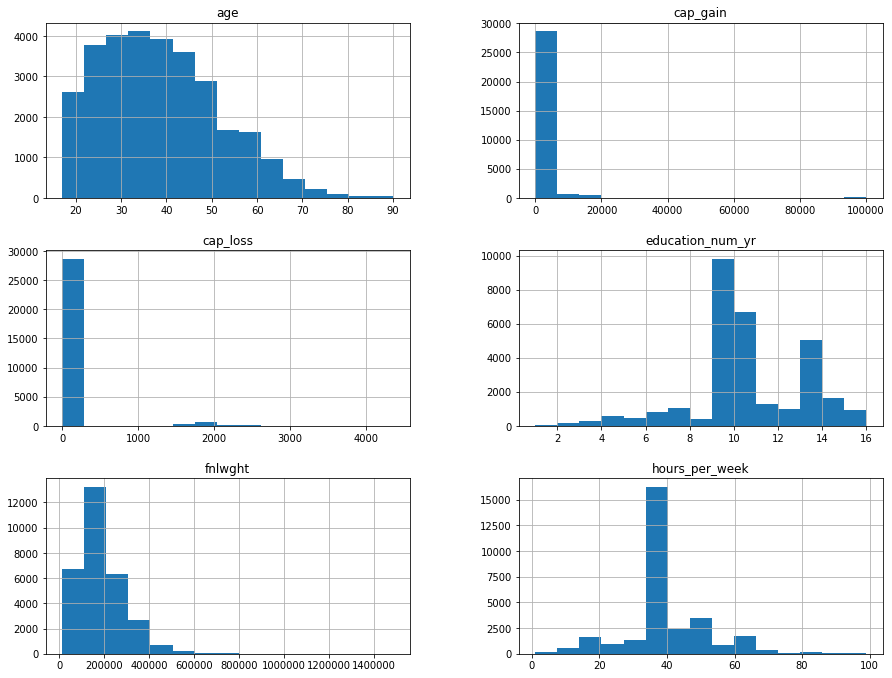

In [83]:
#Distributions of numeric variables
#Code derived from a Toward Data Science blog (link:https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d)
raw_census_95_data.hist(bins=15, figsize=(15,20), layout=(5,2))

Below we can visualize how the categorical variables in our data set behave. 

First, We can see that "private" is overwhelmingly the most common value within *workclass*.  This doens't seem to be of much help, becuase "private" is essentially just one word for "non-government and non-self-employed."

The education attribute seems to be telling us the same story that we saw with *education_num_yr* above: a large proportion of our data set has at least some high school, which agian is indicative of the heavy weighting of the United States.

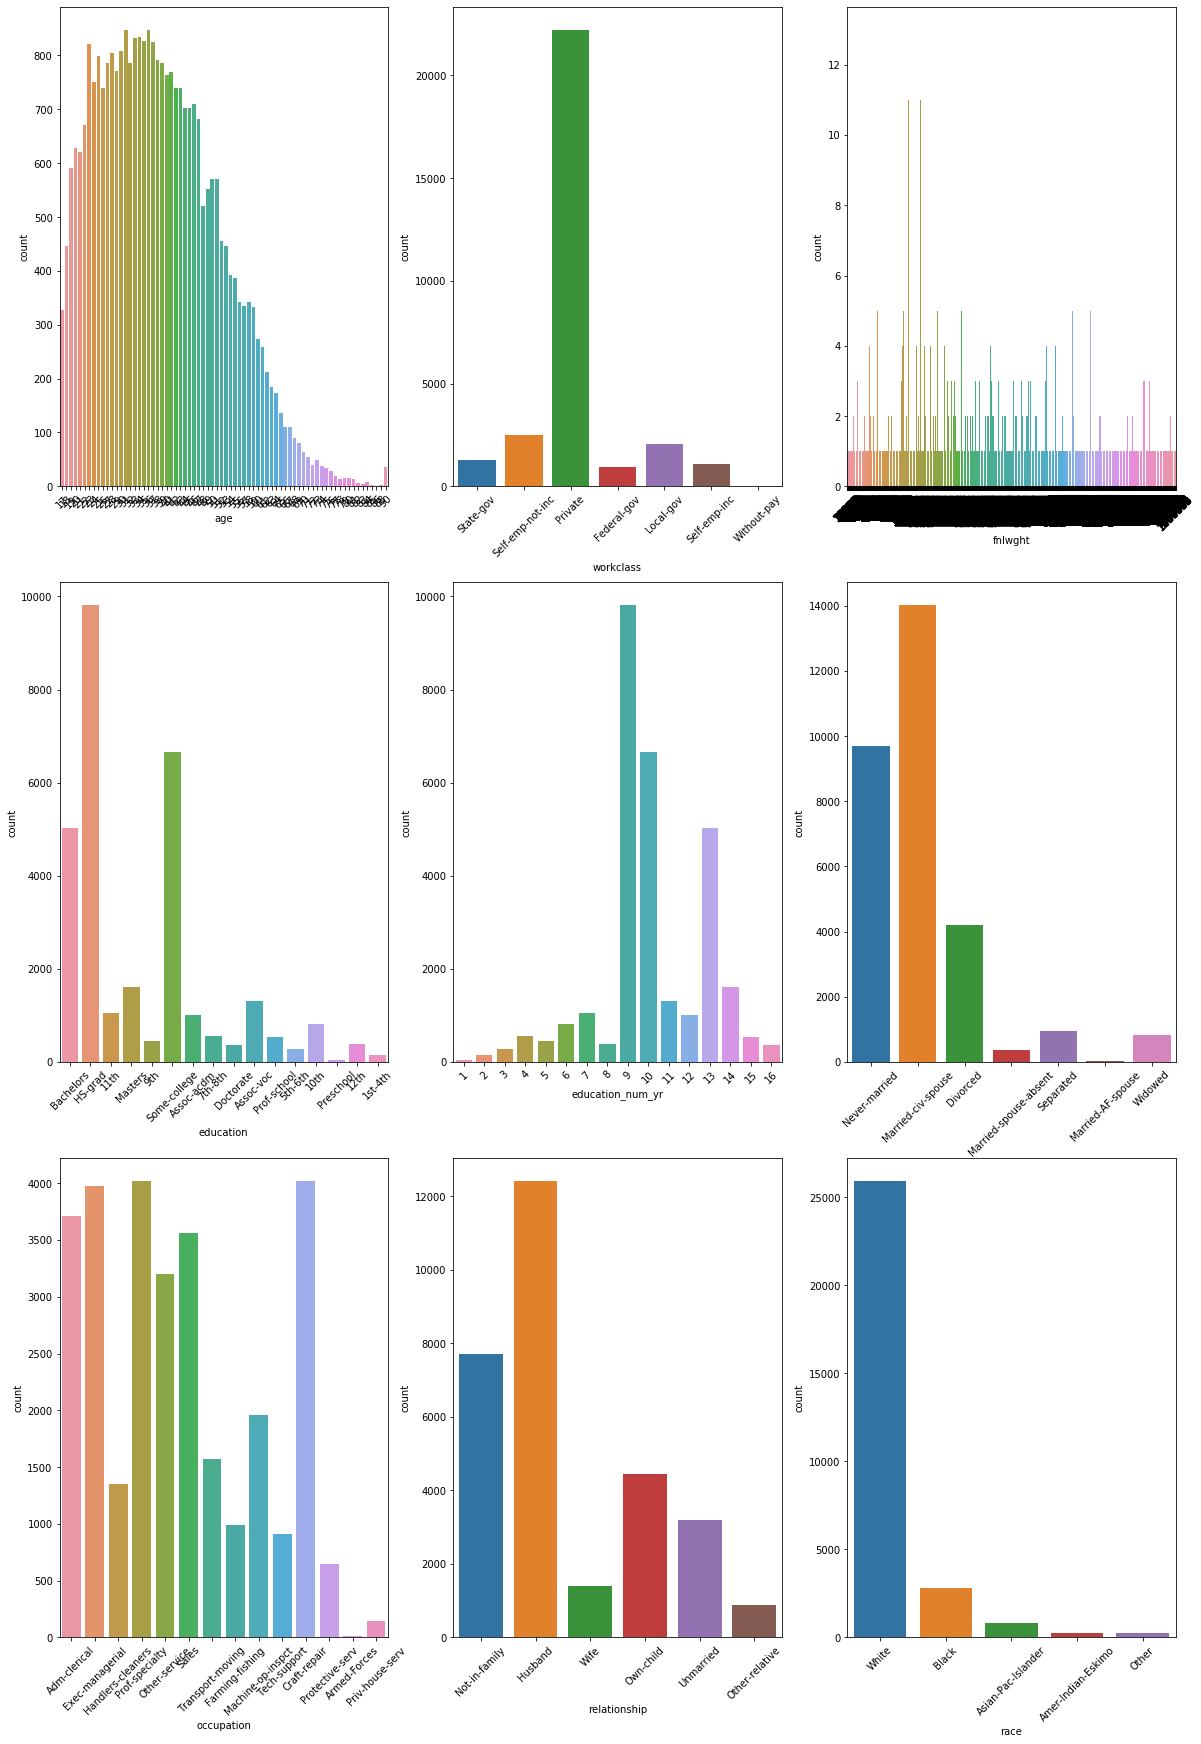

In [86]:
#Counts of the different categorical attributes
#Code derived from a Toward Data Science blog (link:https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d)
fig, ax=plt.subplots(3, 3, figsize=(20, 30))
for attribute, subplot in zip(raw_census_95_data, ax.flatten()):
    sns.countplot(raw_census_95_data[attribute], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

When we view the same data in mosaic plots, we can see the same trends emerge.

"Private" is the mode in the *workclass* attribute.

The vast majority of the data set has at least some high school education, which is evident in the mosaic plot of *education*.

The majority of the data set is from the US, which makes sense considering this is US Census data.

There are also more males than females in the data set.

workclass


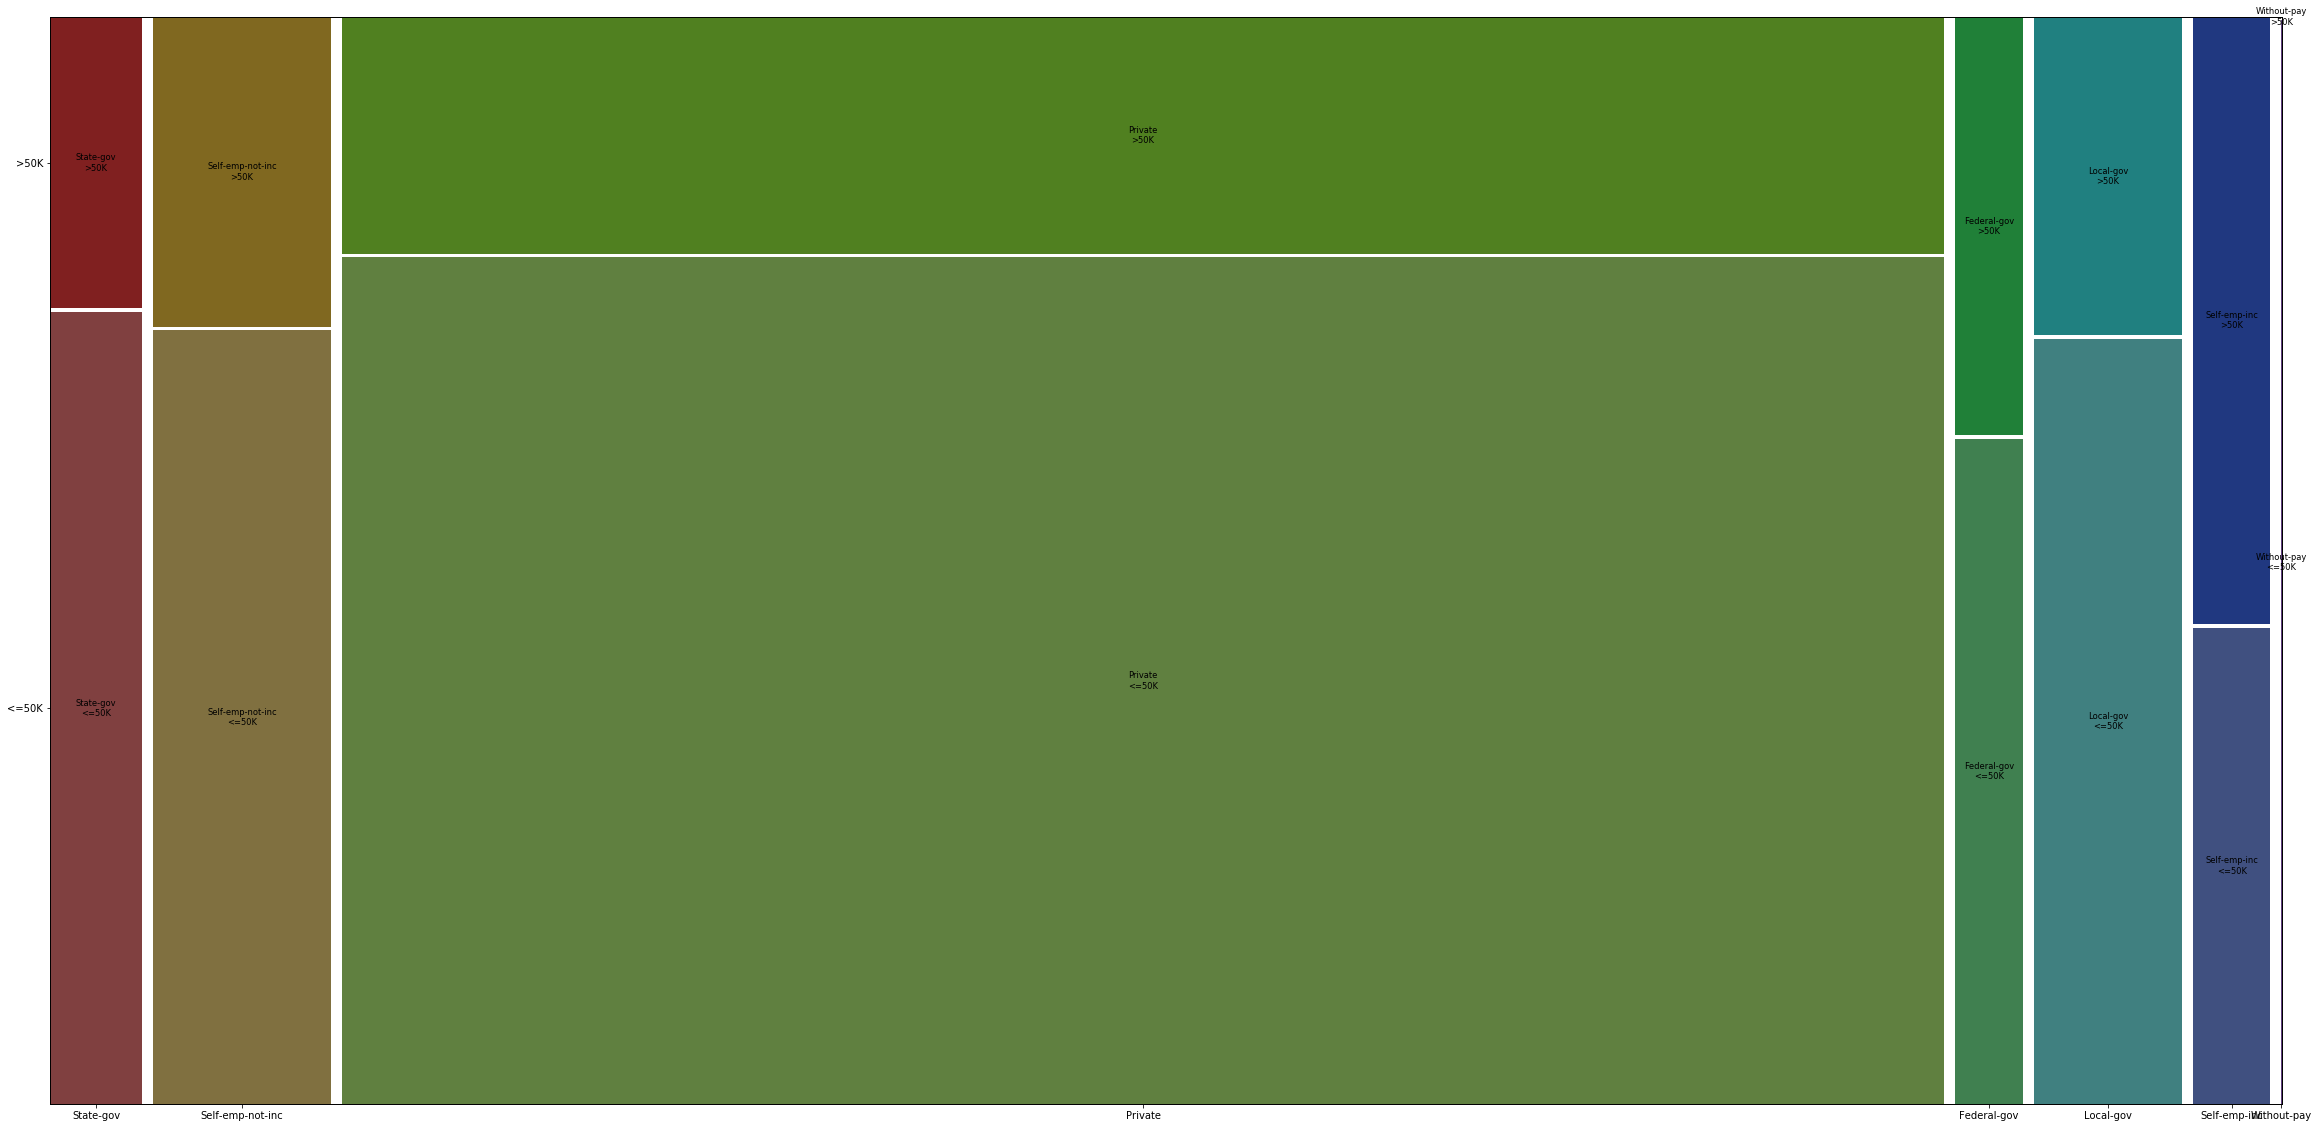

education


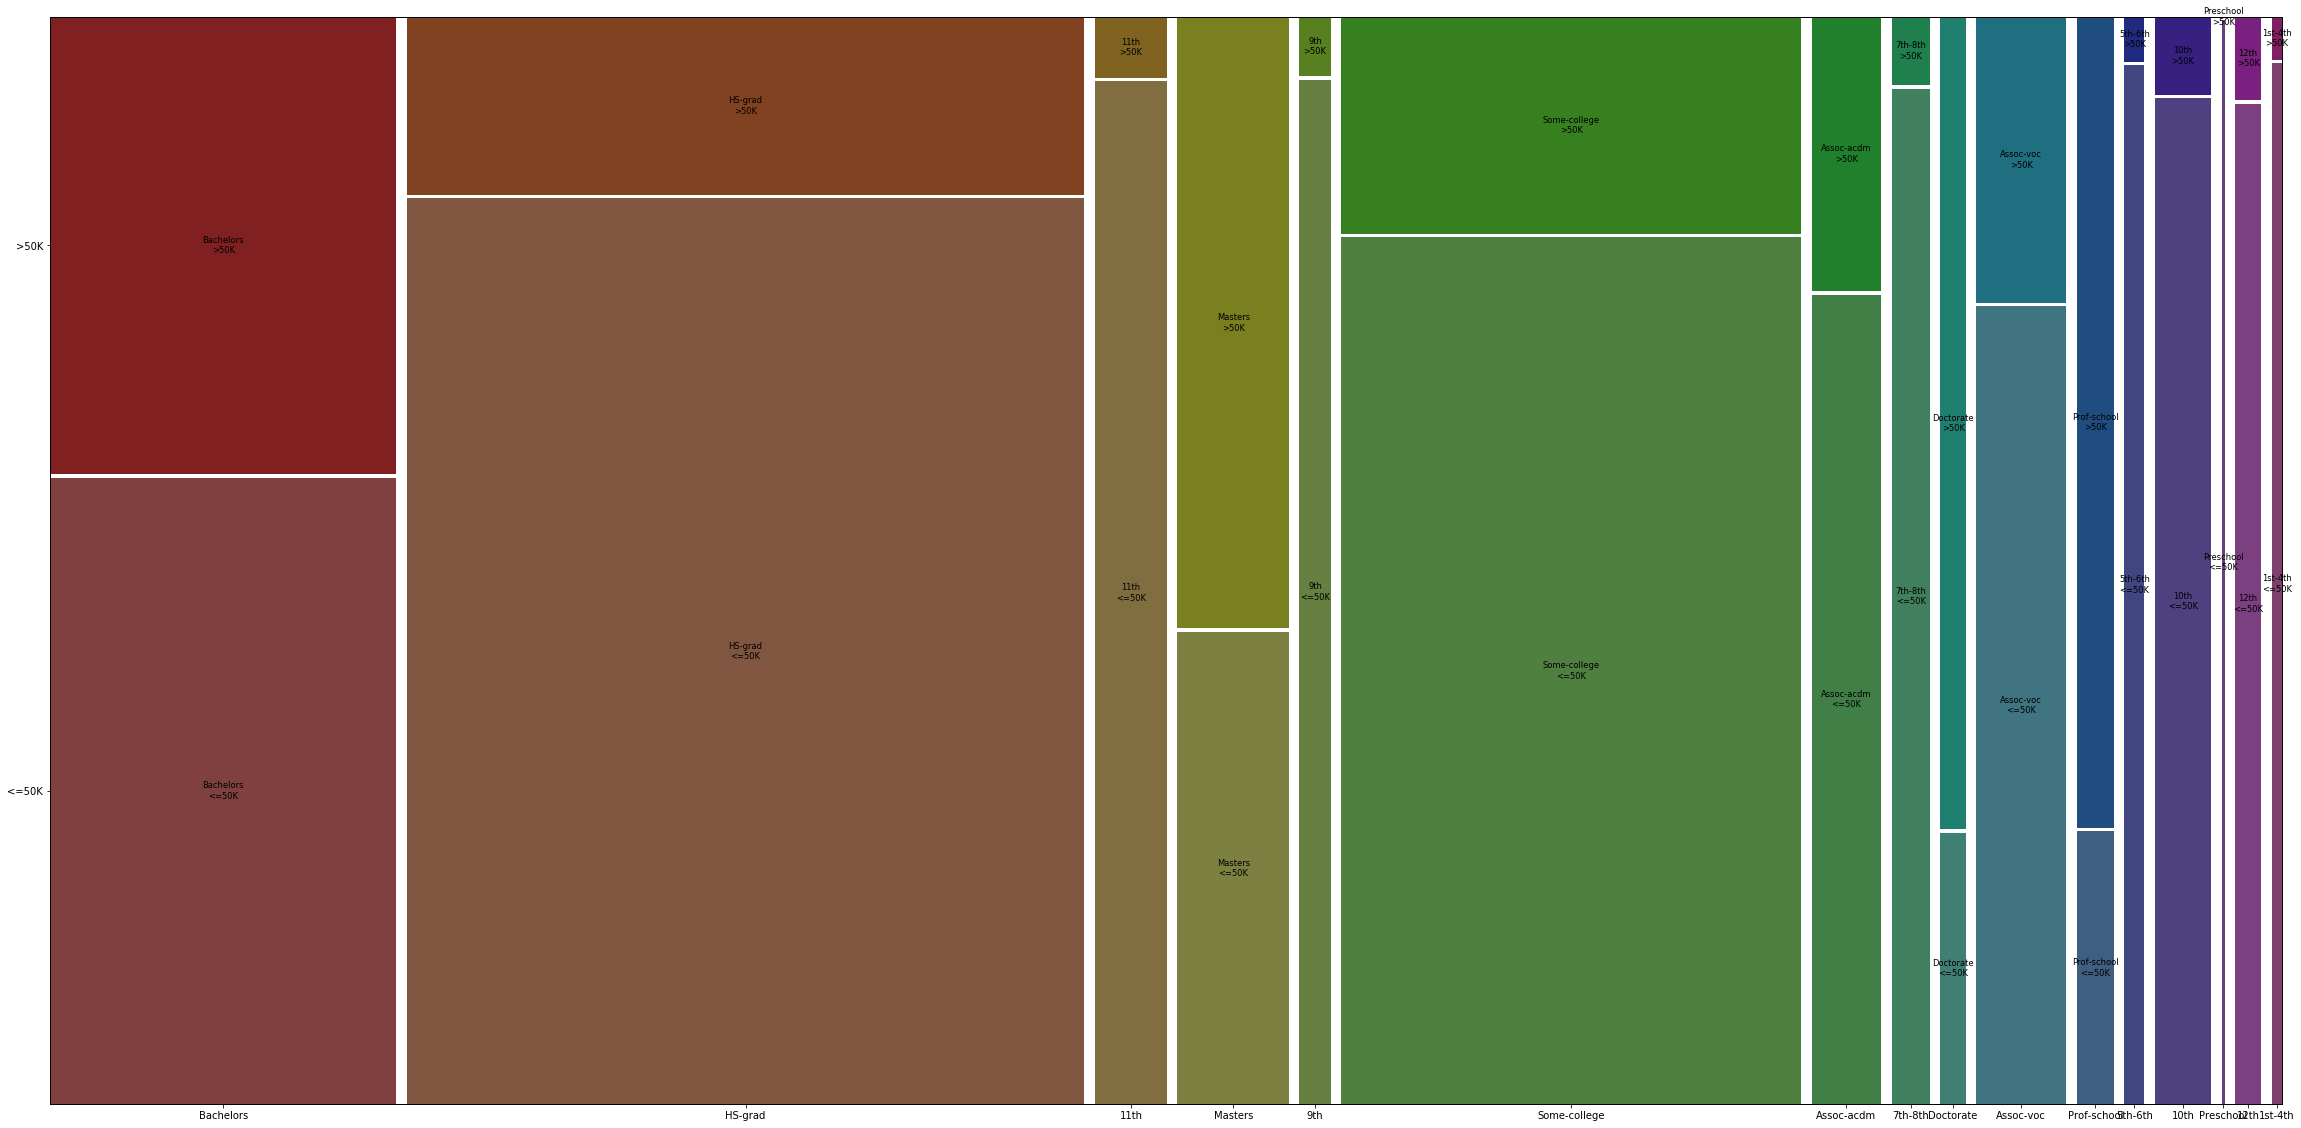

marital_status


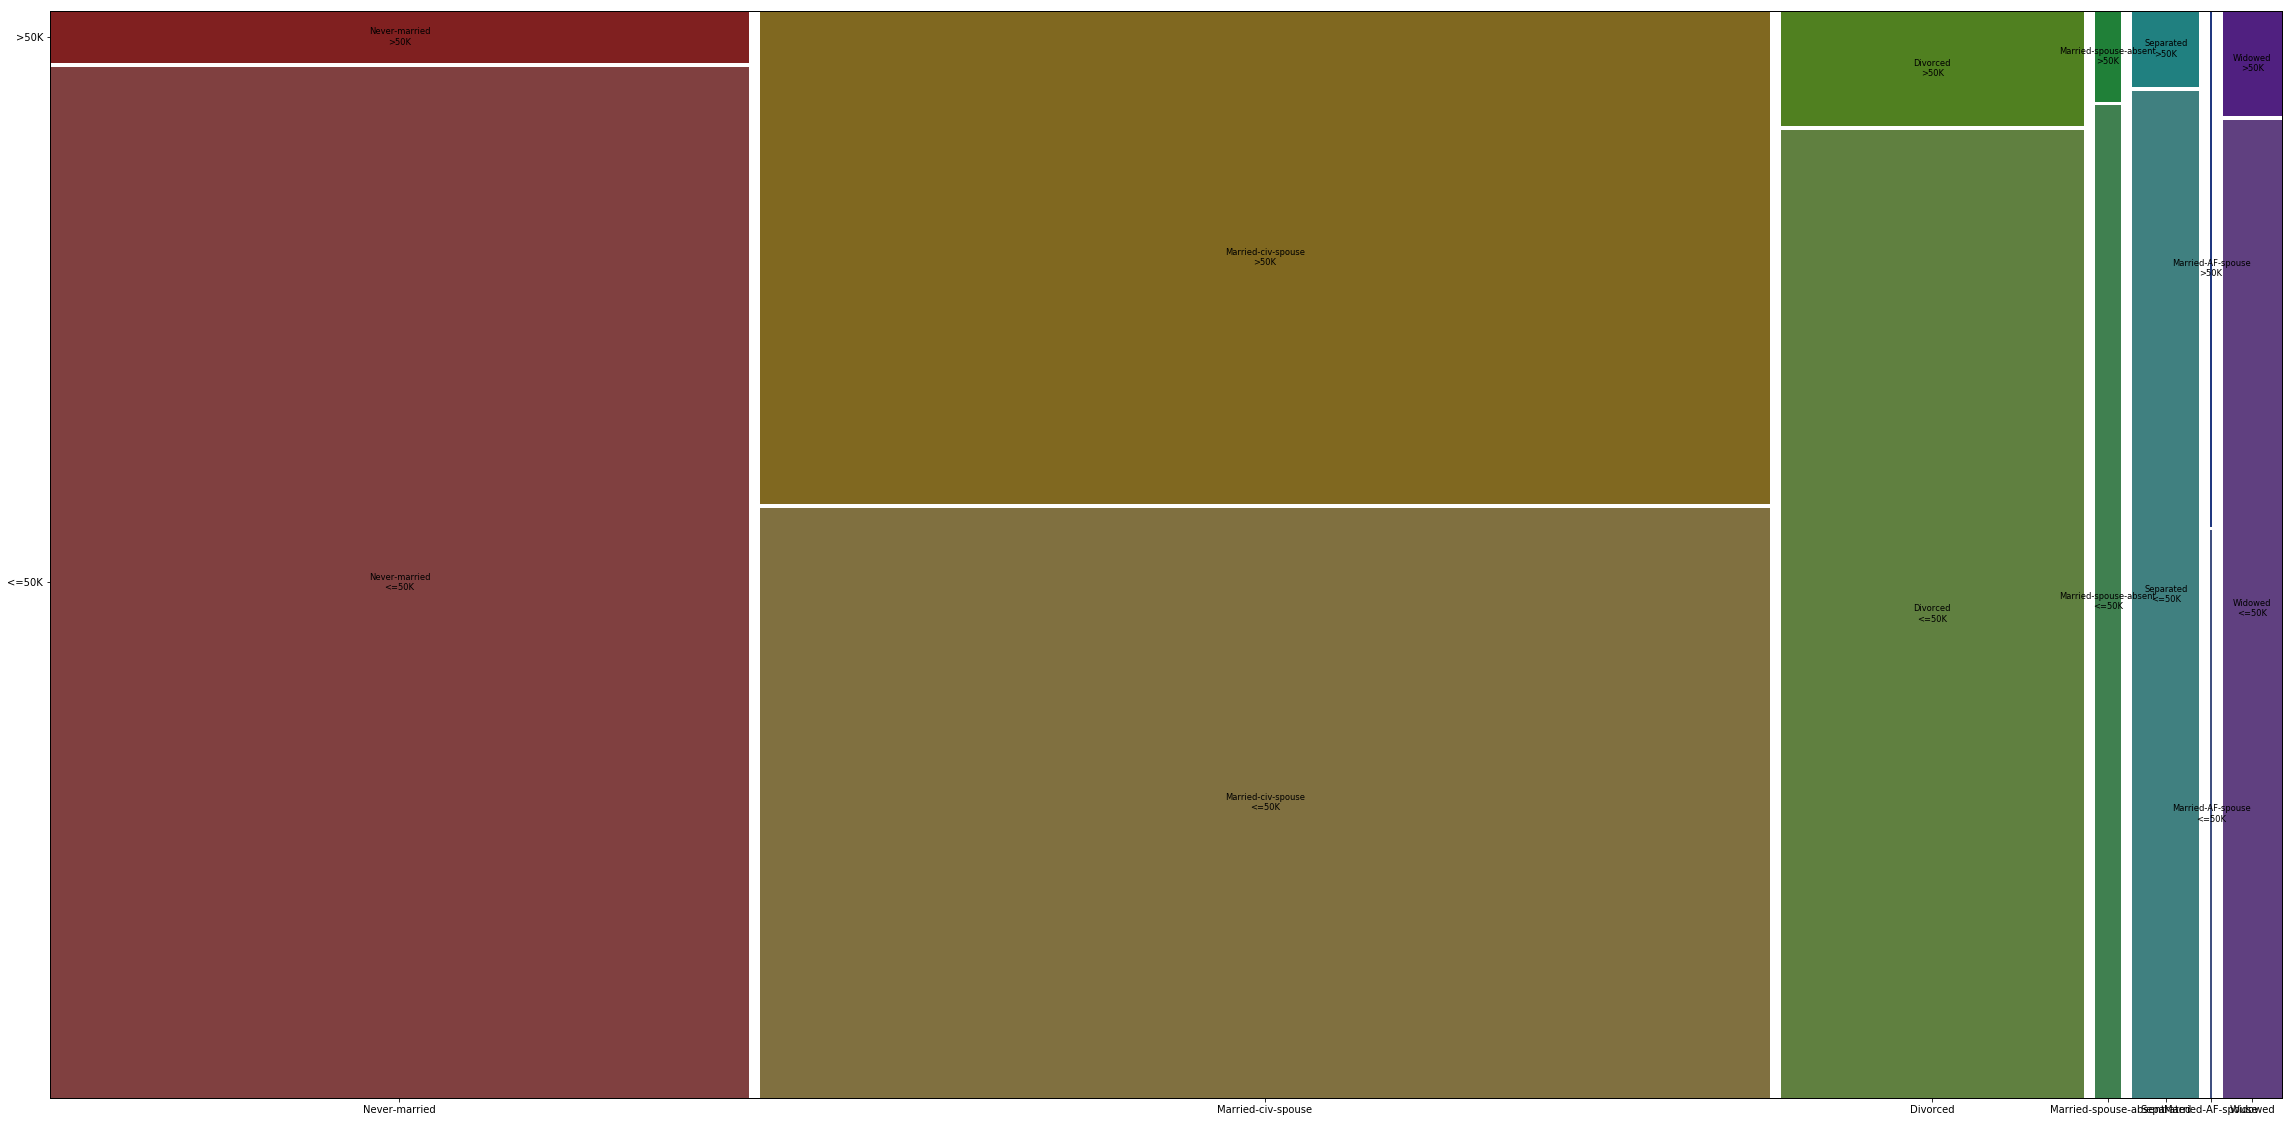

occupation


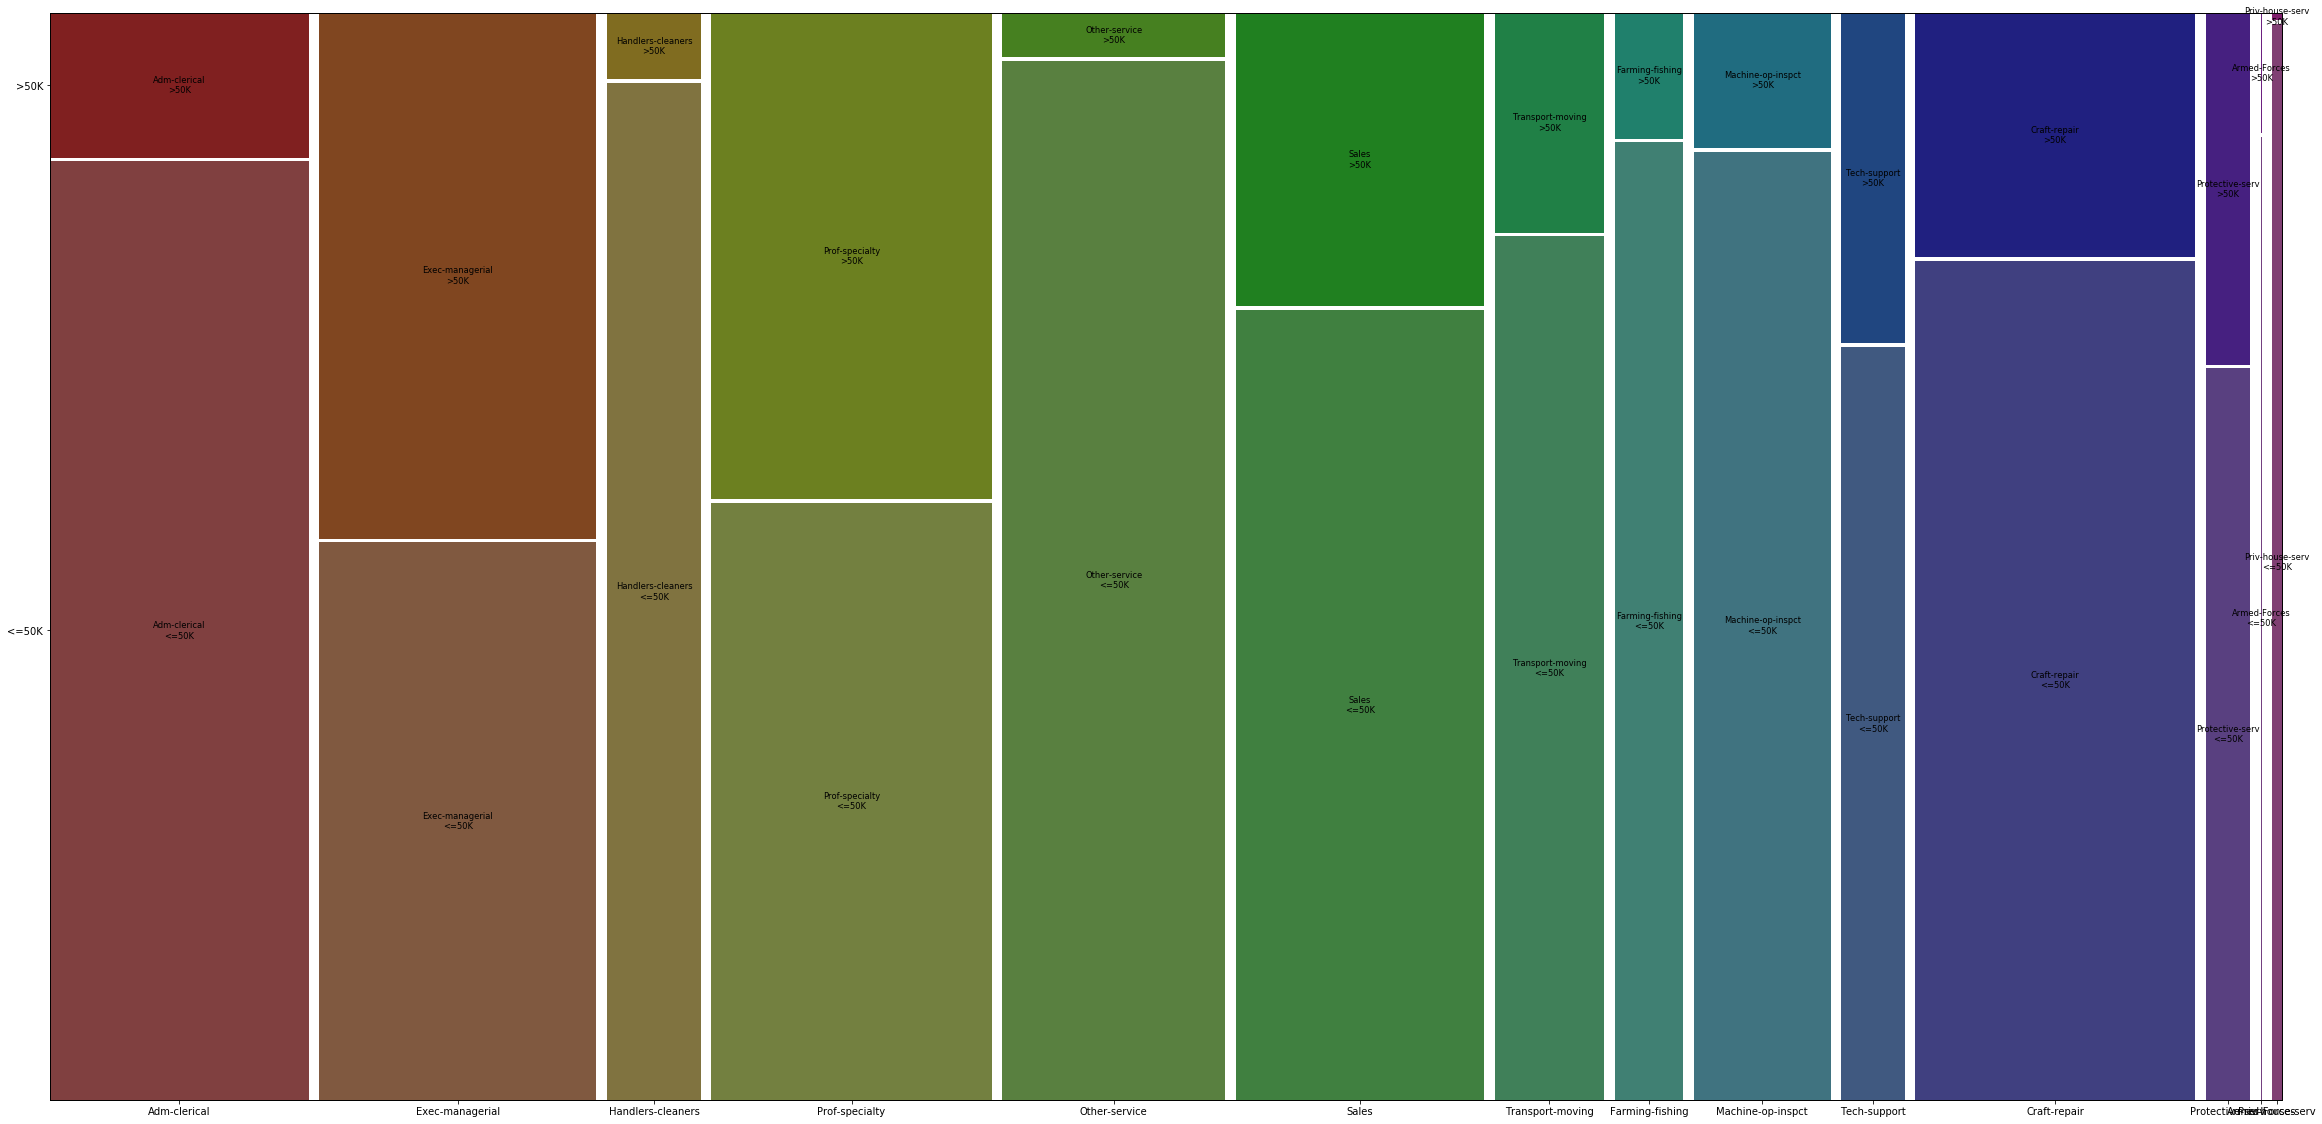

relationship


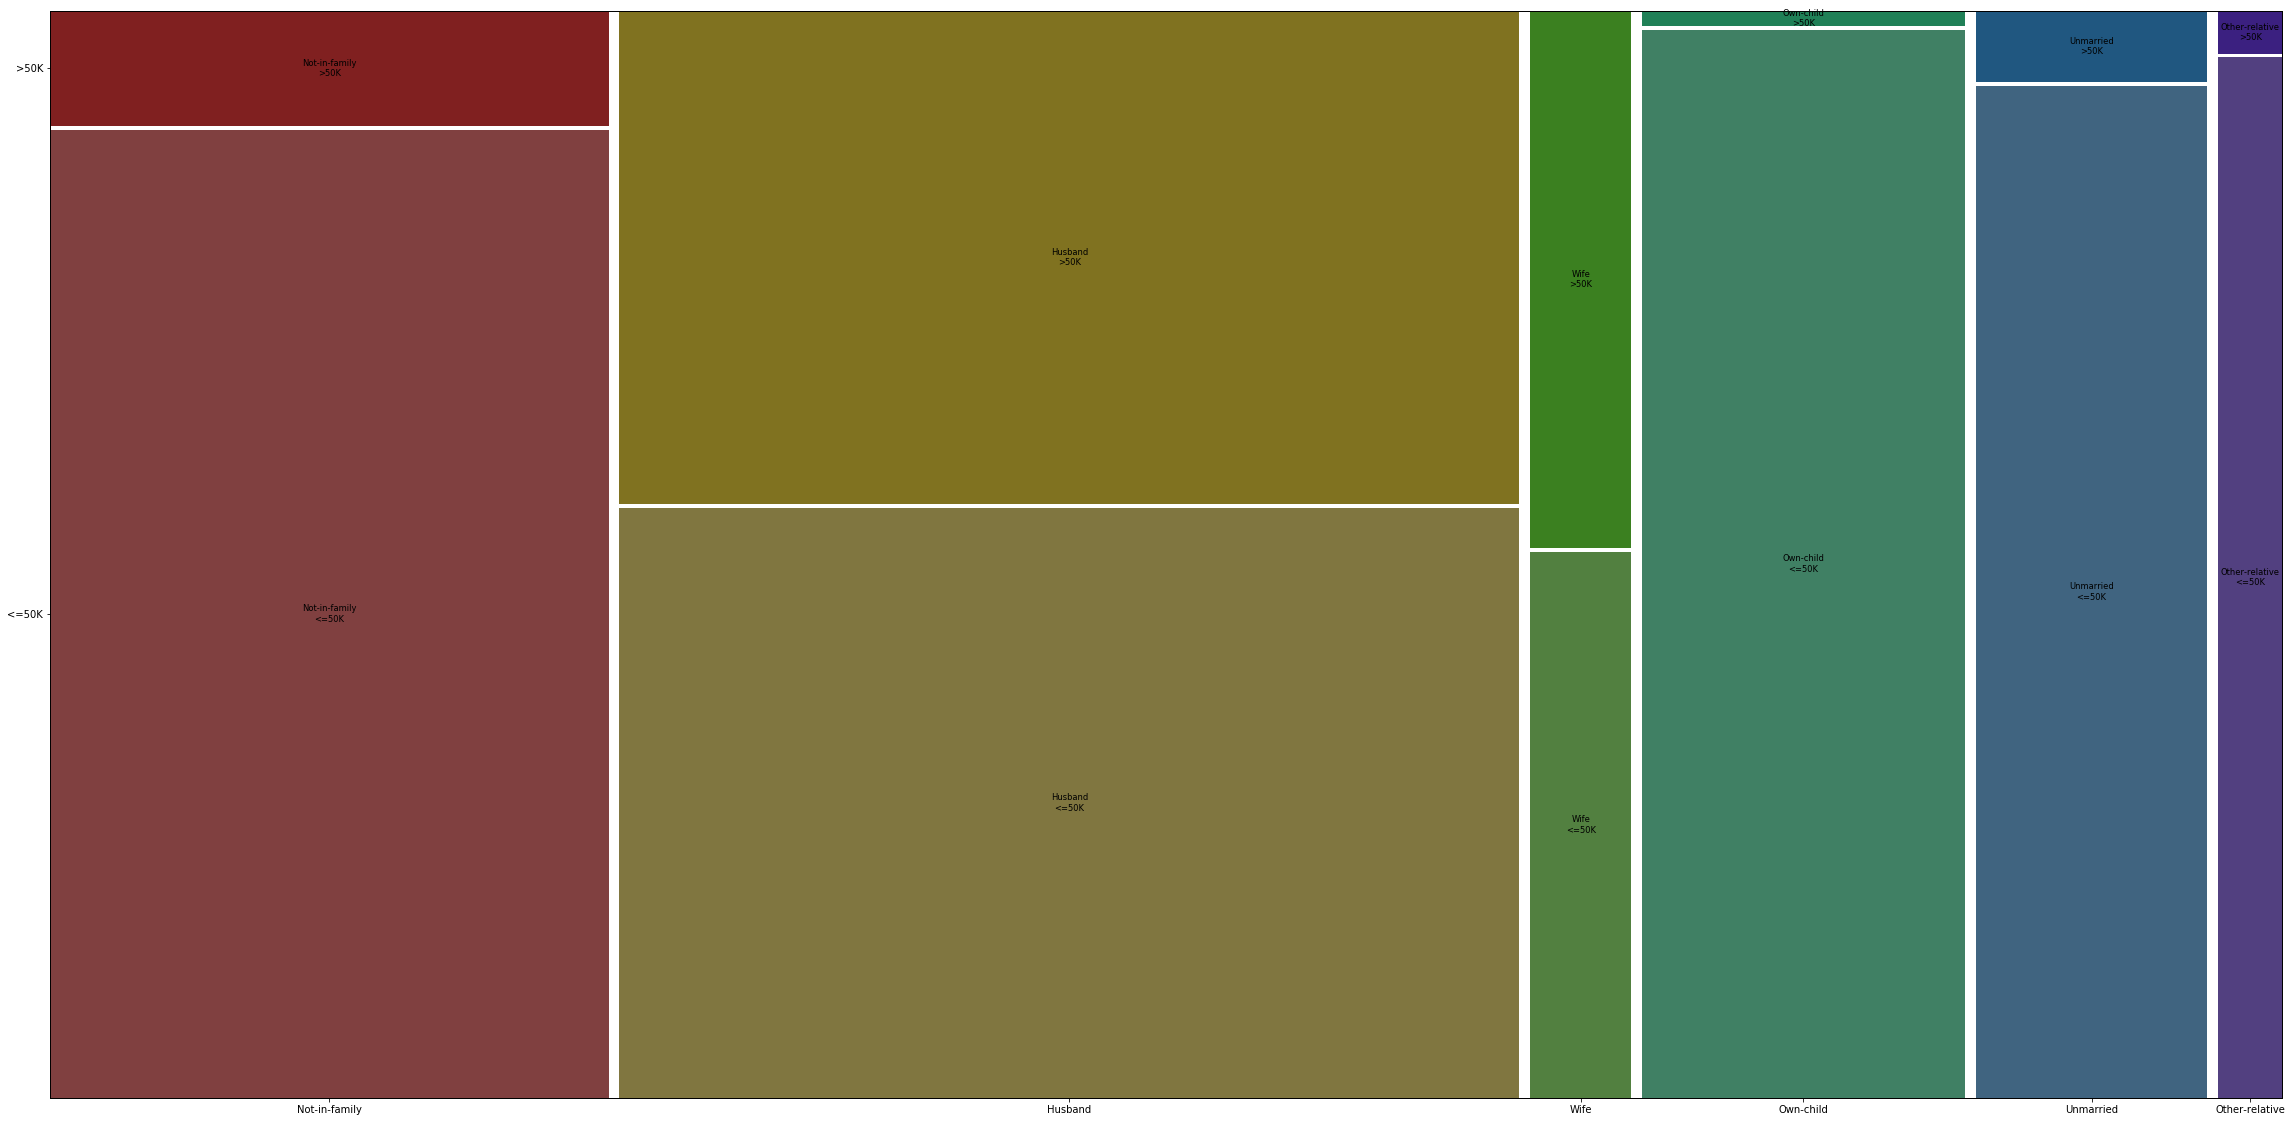

race


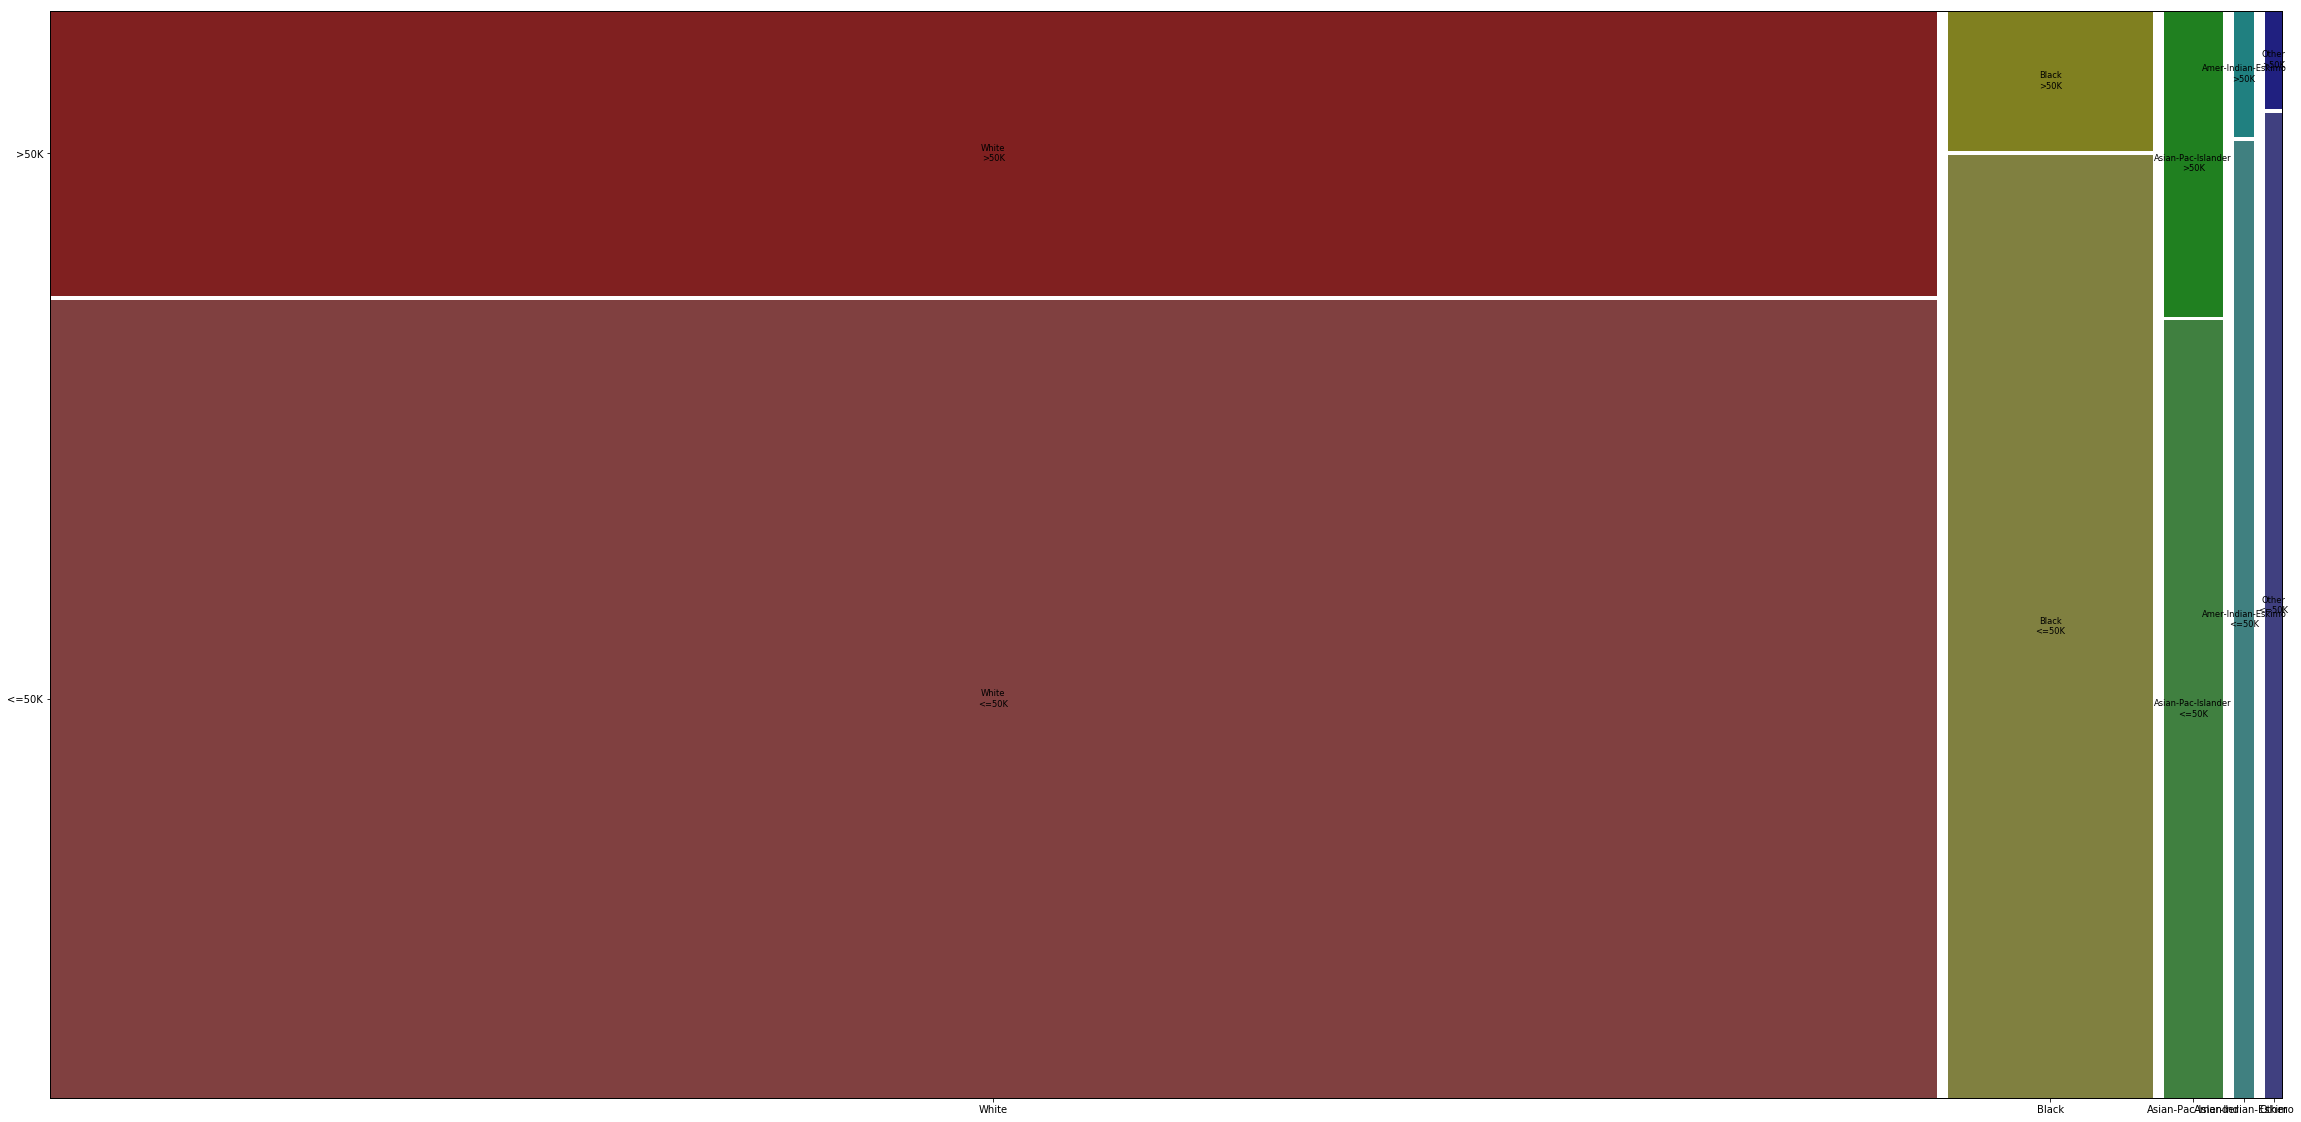

sex


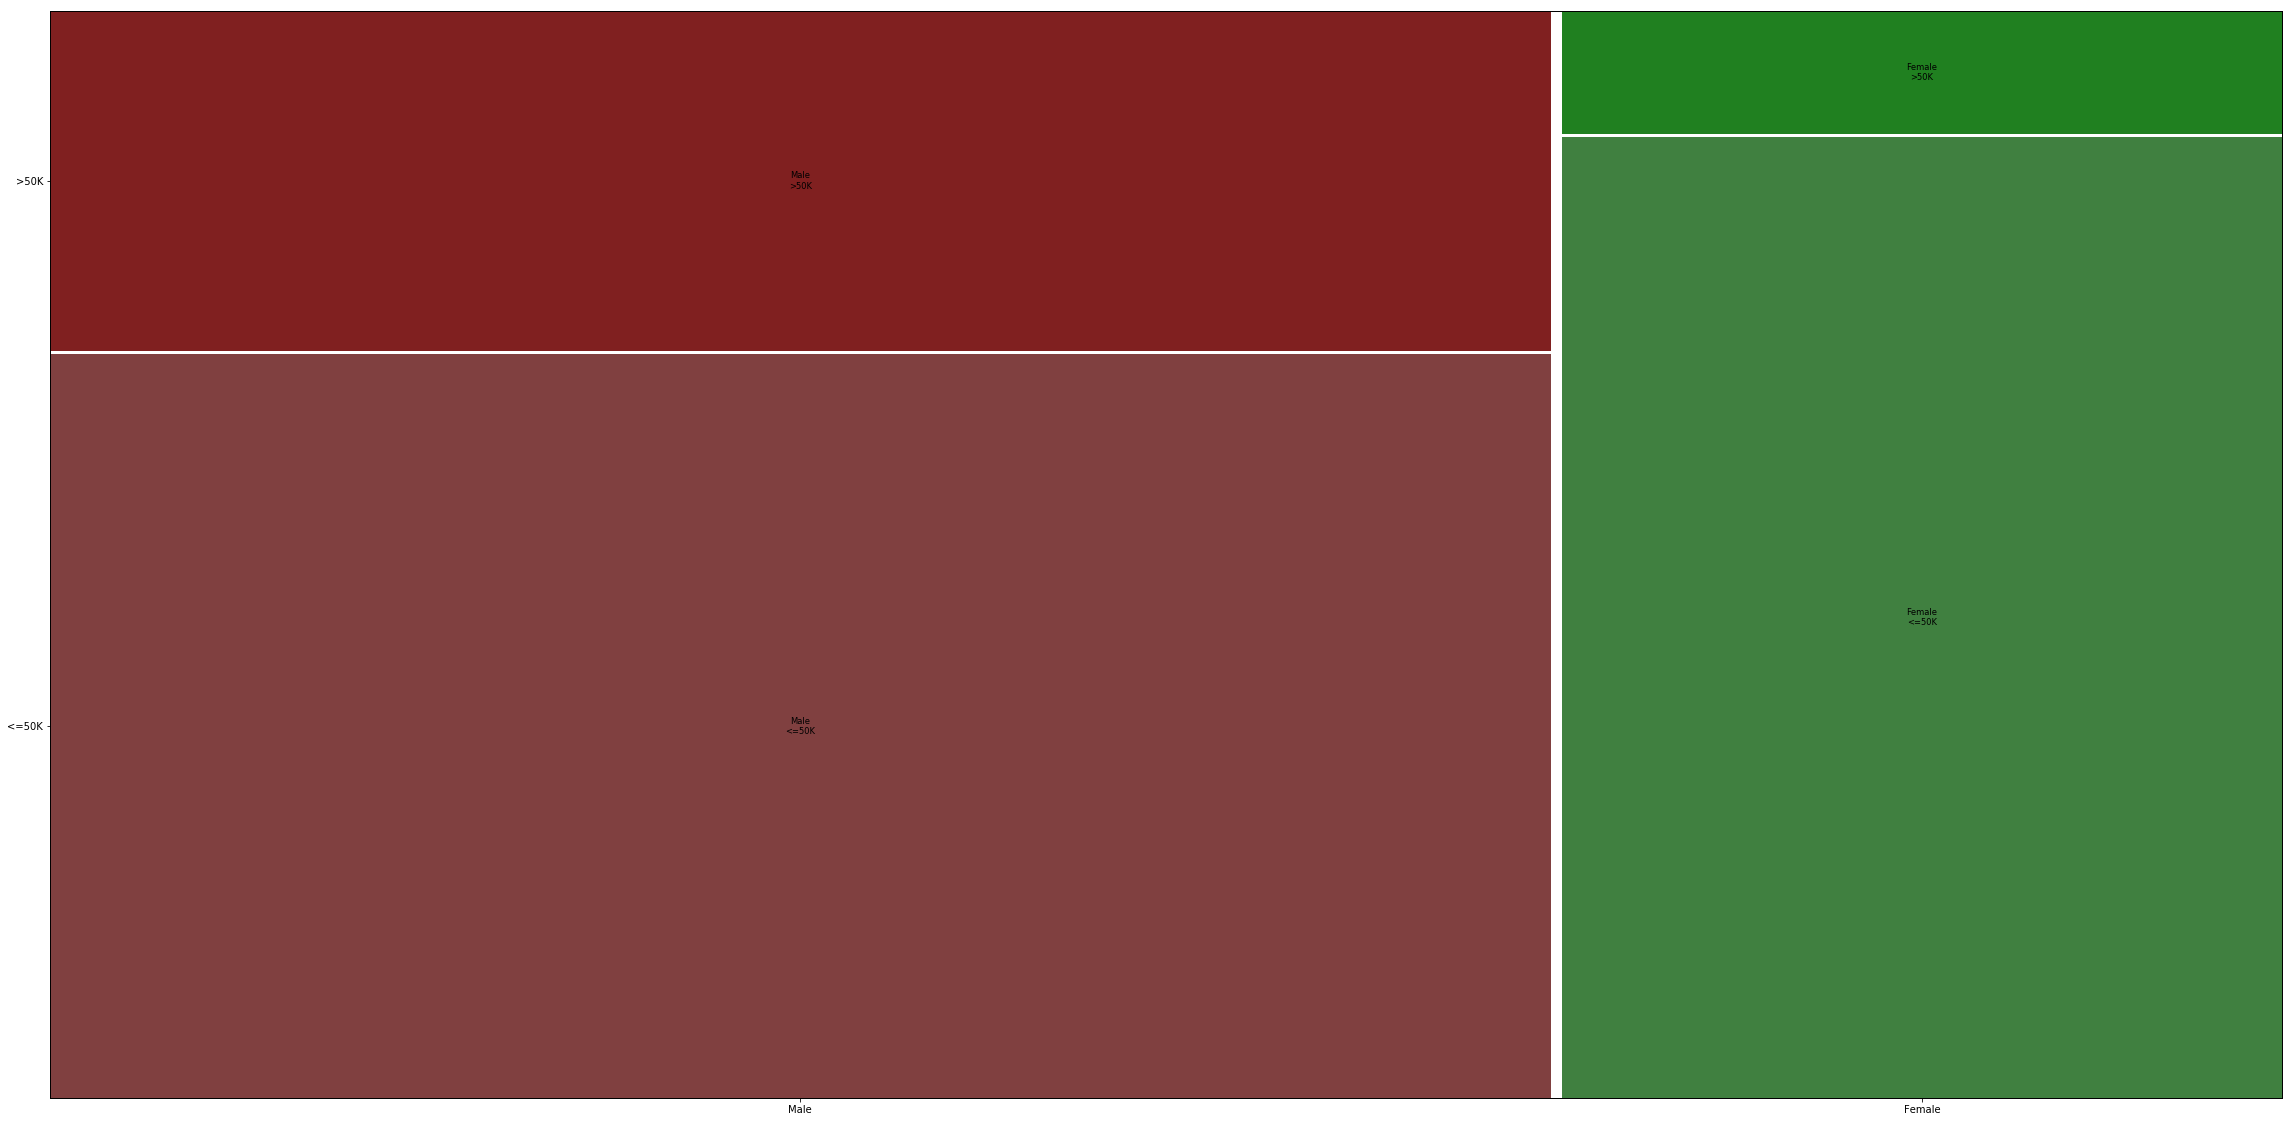

native_country


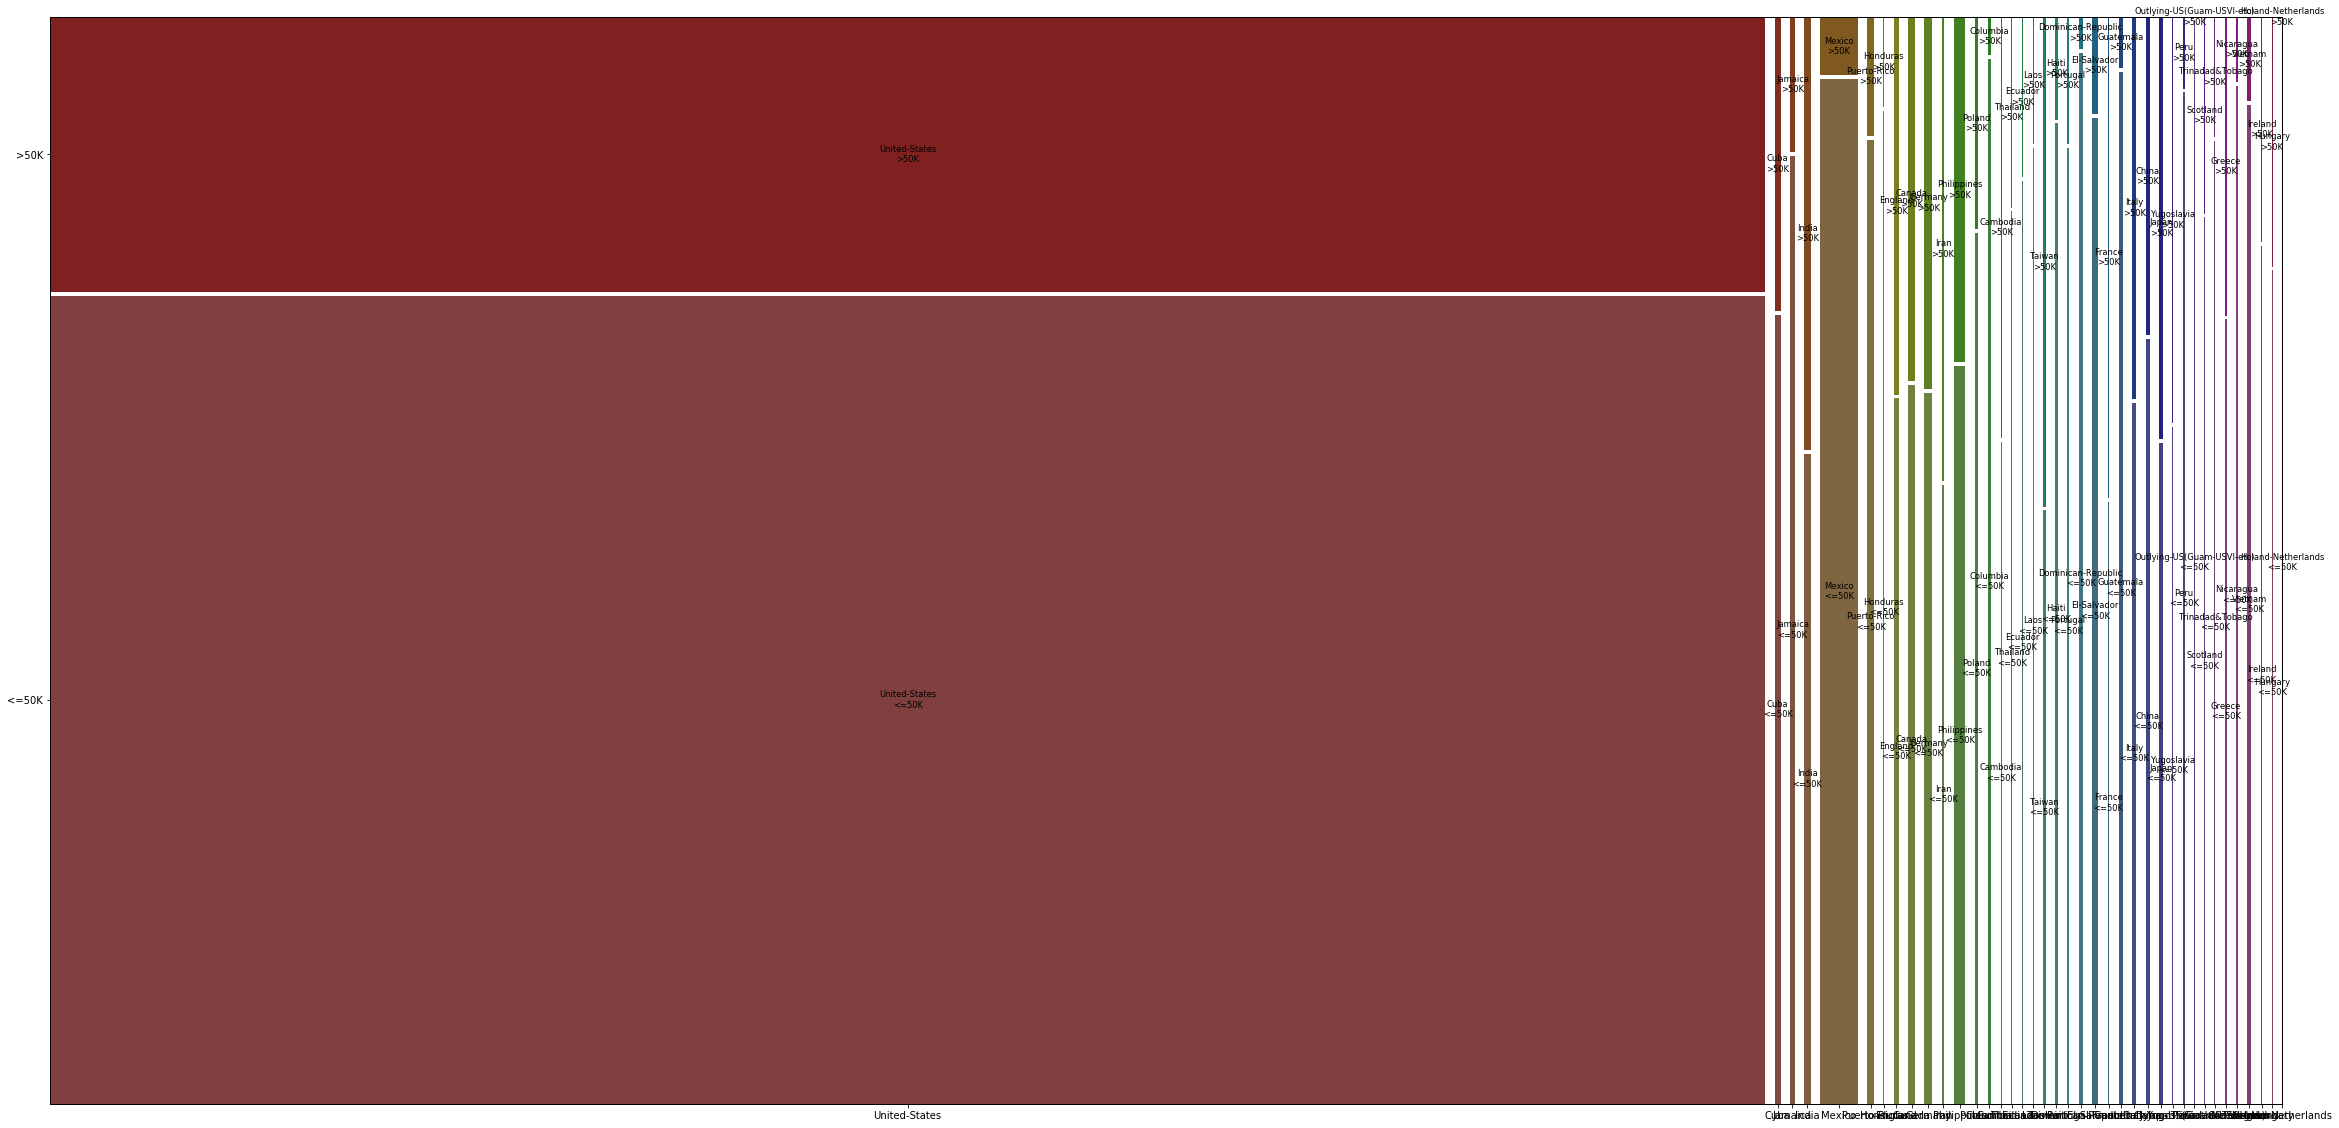

origin_descent


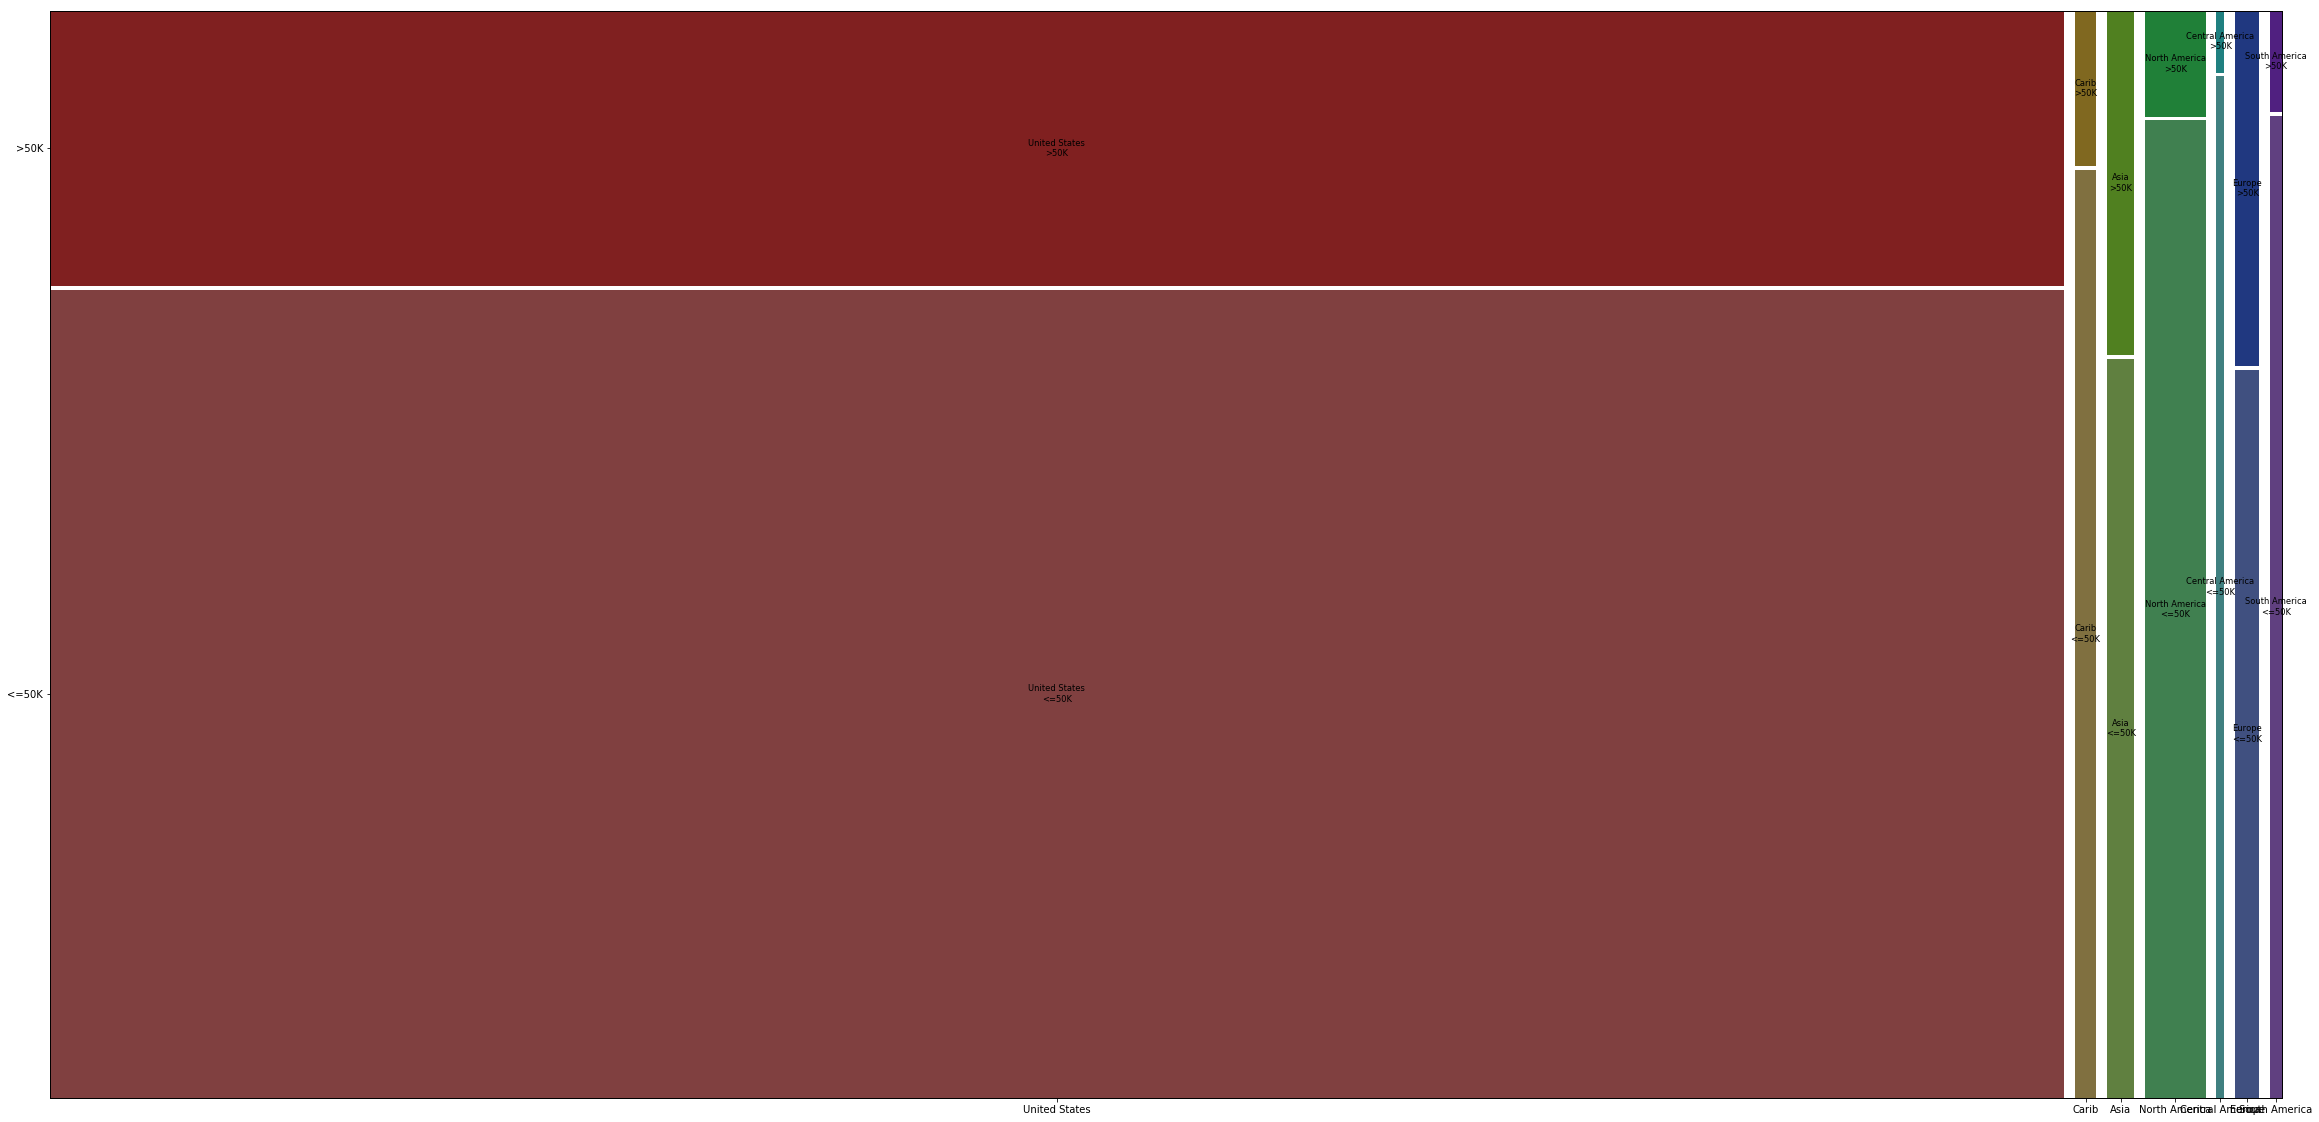

origin_descent_us


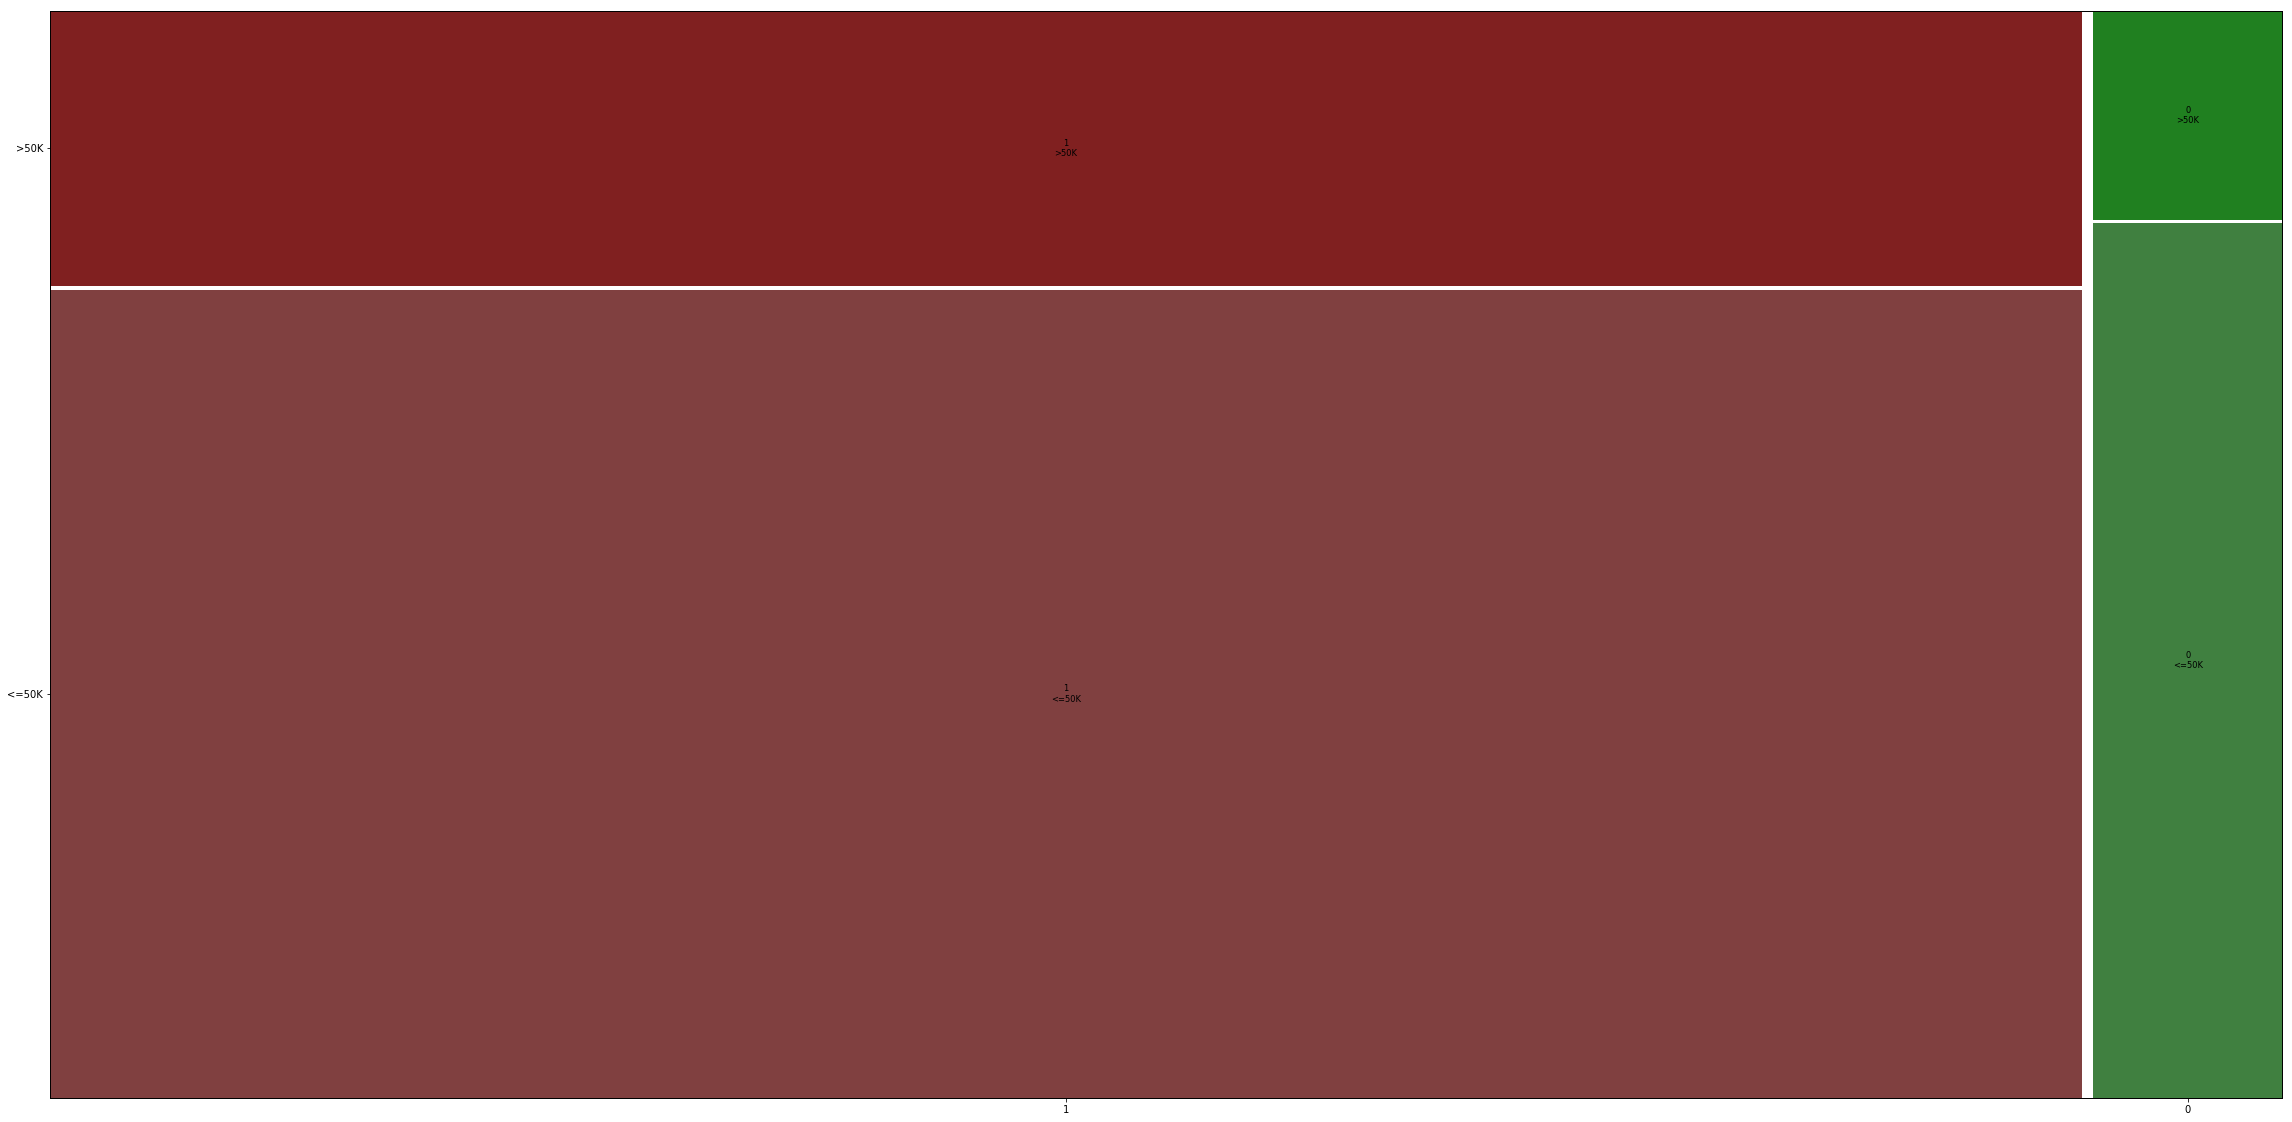

level_of_employ


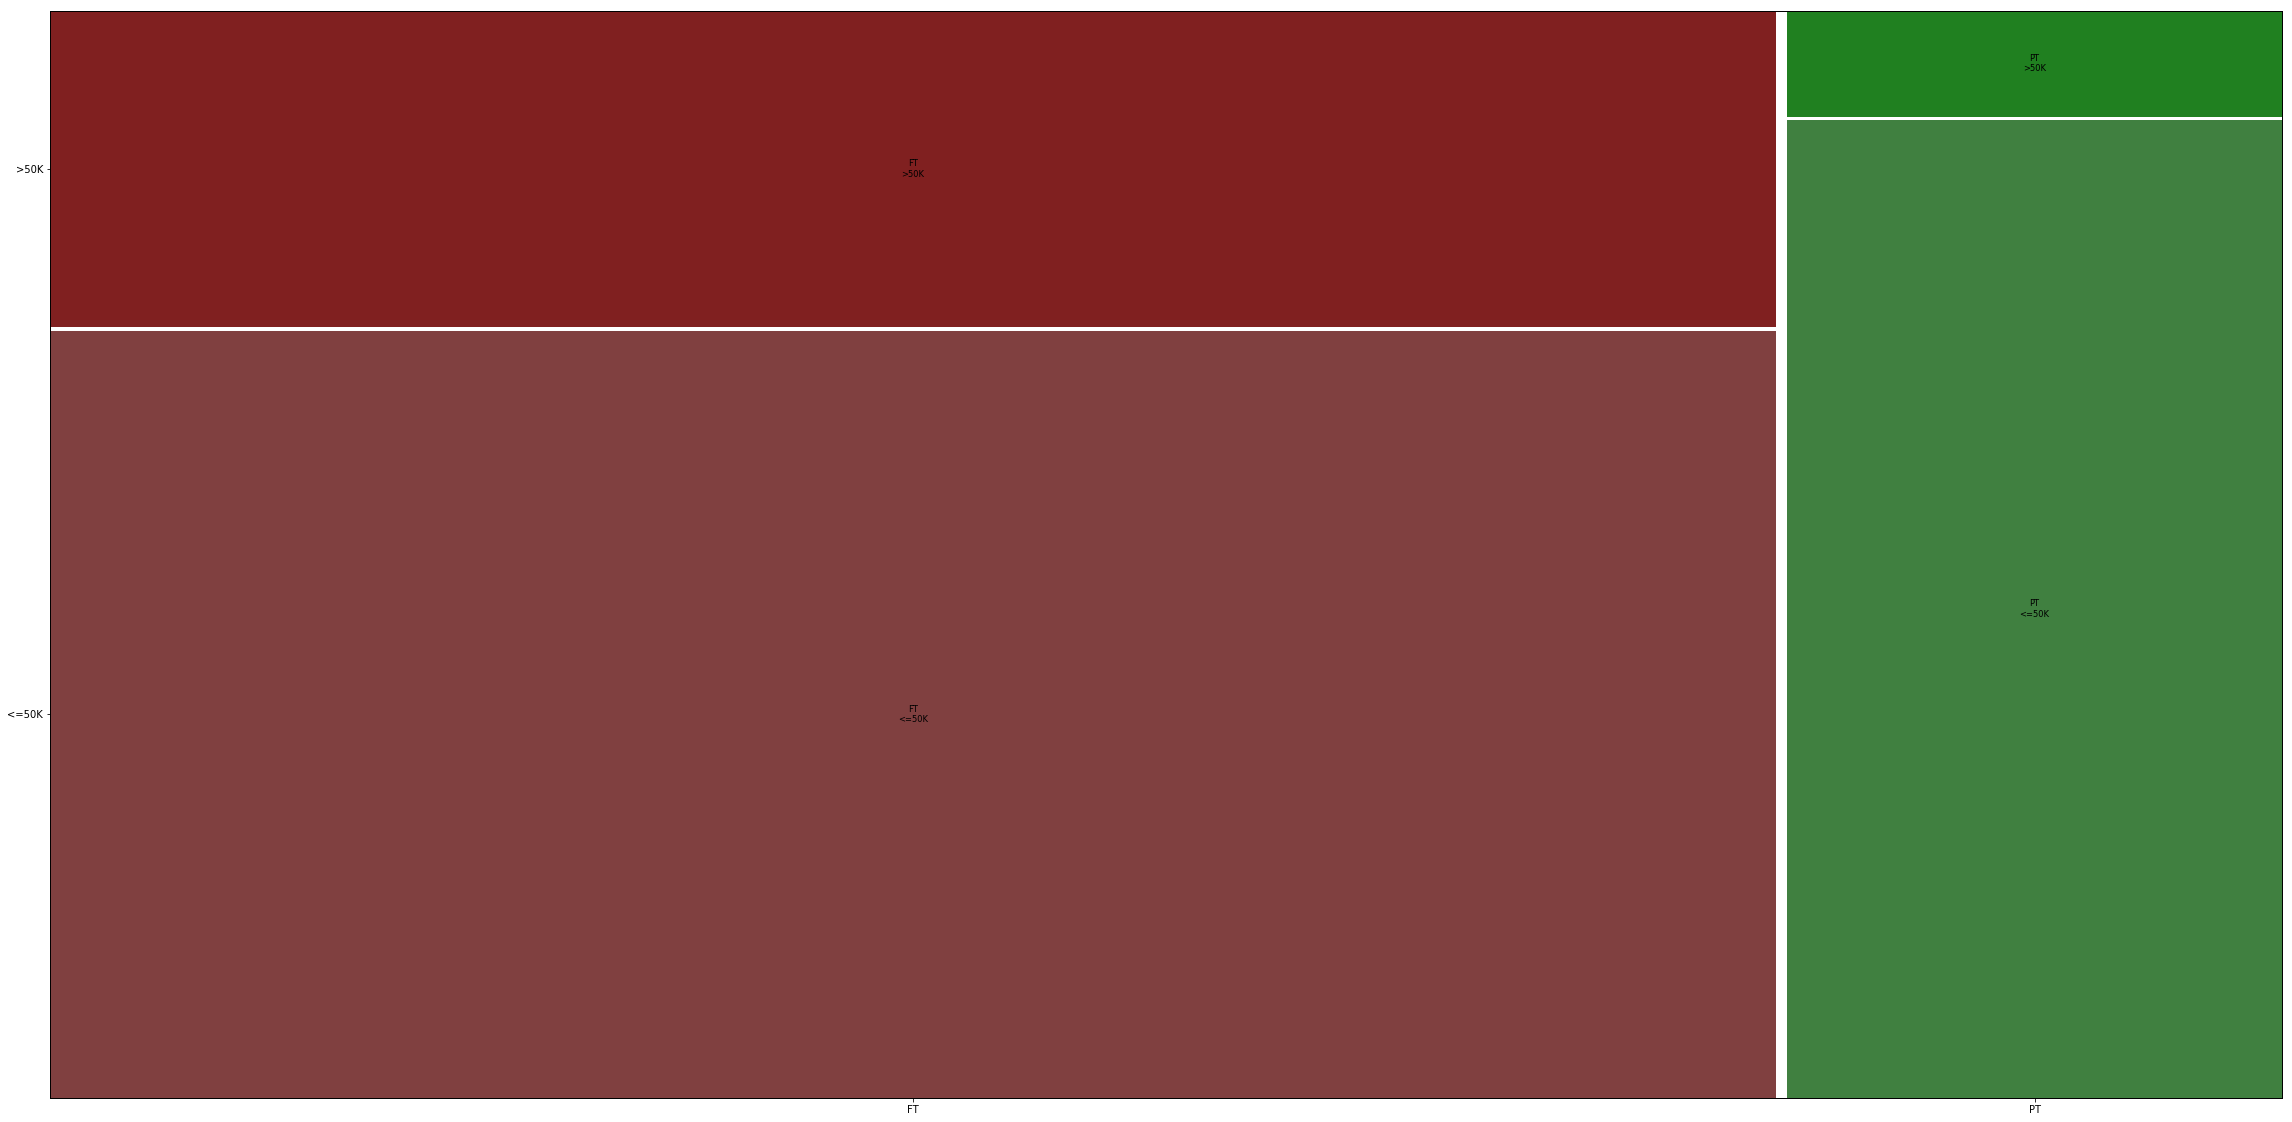

age_range


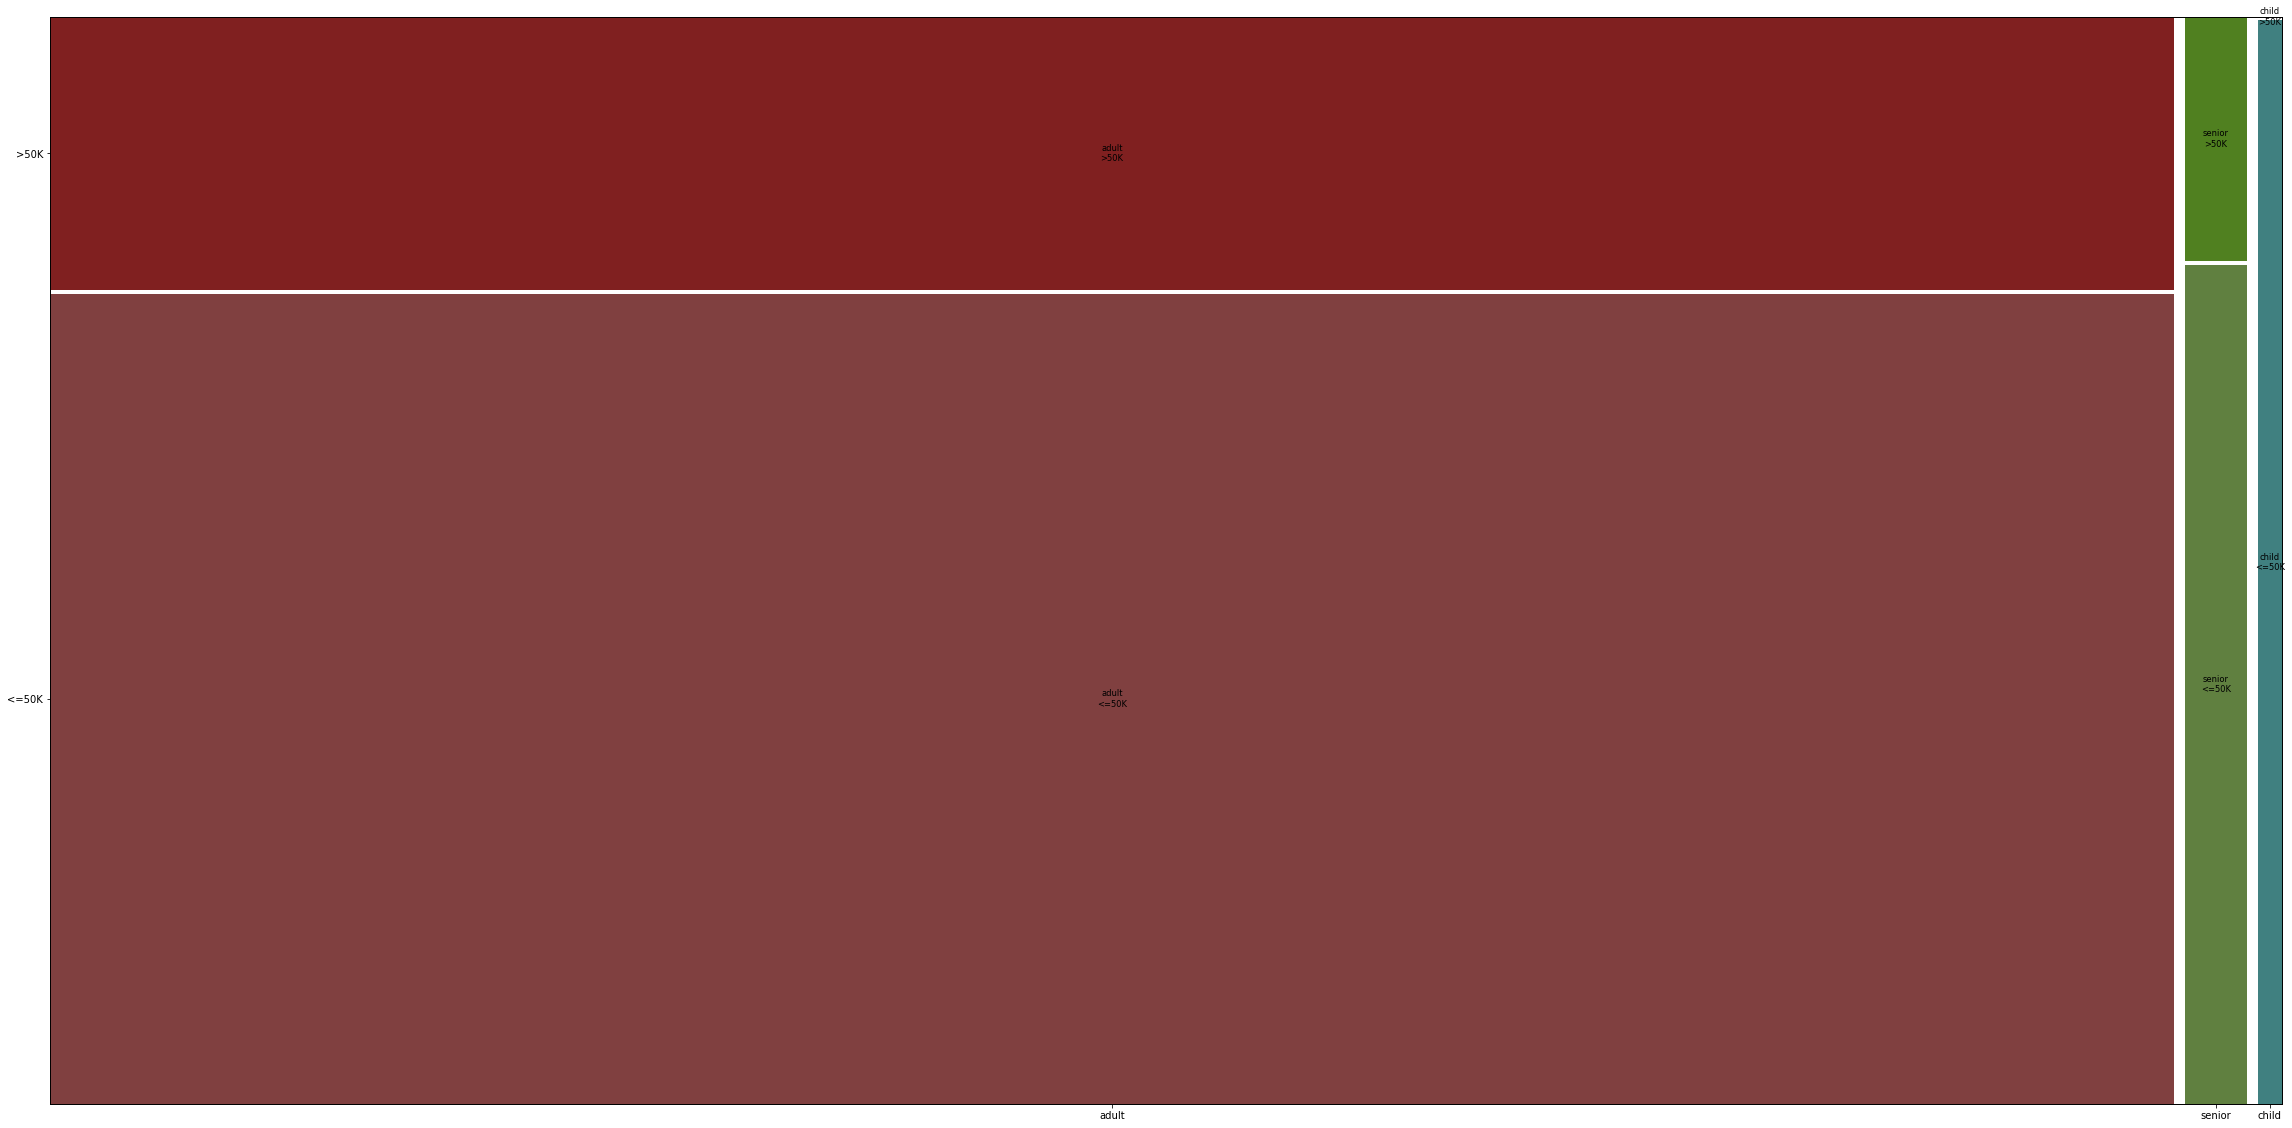

education_level


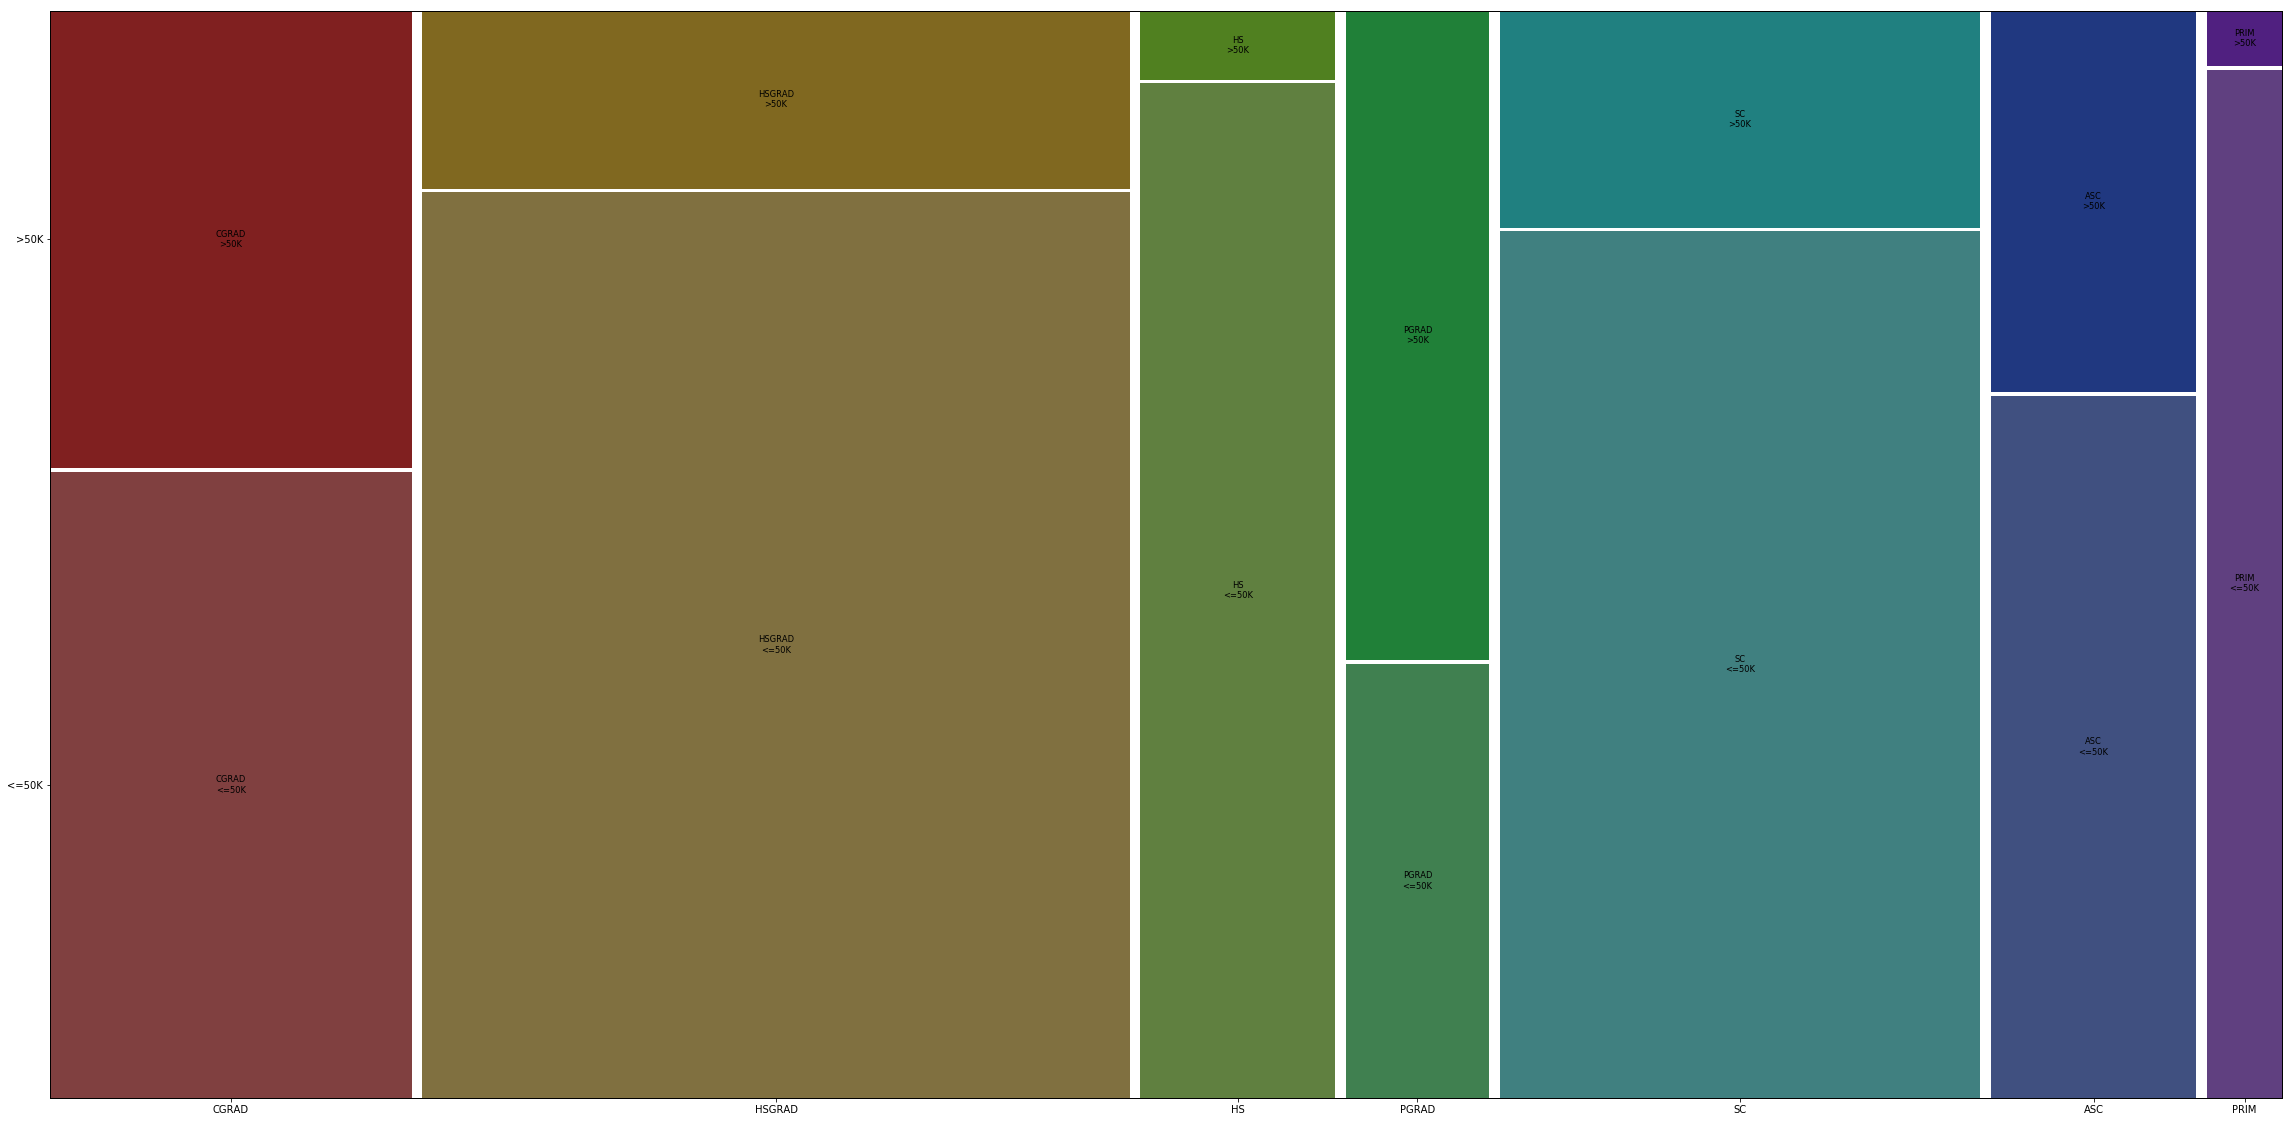

In [42]:
#https://www.statsmodels.org/stable/generated/statsmodels.graphics.mosaicplot.mosaic.html
#https://stackoverflow.com/questions/28517276/changing-fig-size-with-statsmodel -- cel's answer 
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import matplotlib as mpl

mosaic_vars = catagorical_vars

target_var = 'annual_income'
for var in mosaic_vars:
    
    n, m = 40, 20

    with mpl.rc_context():
        mpl.rc("figure", figsize=(n,m))
        
        print(var)
    
        mosaic(raw_census_95_data,[str(var), target_var], horizontal = True, gap = 0.005)

        plt.show()

## Attribute Relationships:
#### *Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

Now let's take a look at how these continuous variables correlate to one another while we separate the observations based on our objective of separating those who make over 50k and those who make less.  

We can observe some separation of the 50k income in the *age* vs *age* density plot on the top left.  It could be that as people age, they see an increase in income which eventually puts them over the 50k threshold. We will have to keep *age* in mind as we develop our classification method. 

Overall, there appears to be very little, if any, correlation present between the other continouous variables.  This bodes well in future use of this dataset should we want to apply methods that penalize multicollinearity, such as regression.

*Income_outcome* and *origin_us* are technically binary variables, so there isn't a whole lot we can glean from the pairwise comparisons without further analysis.

In [88]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 2 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

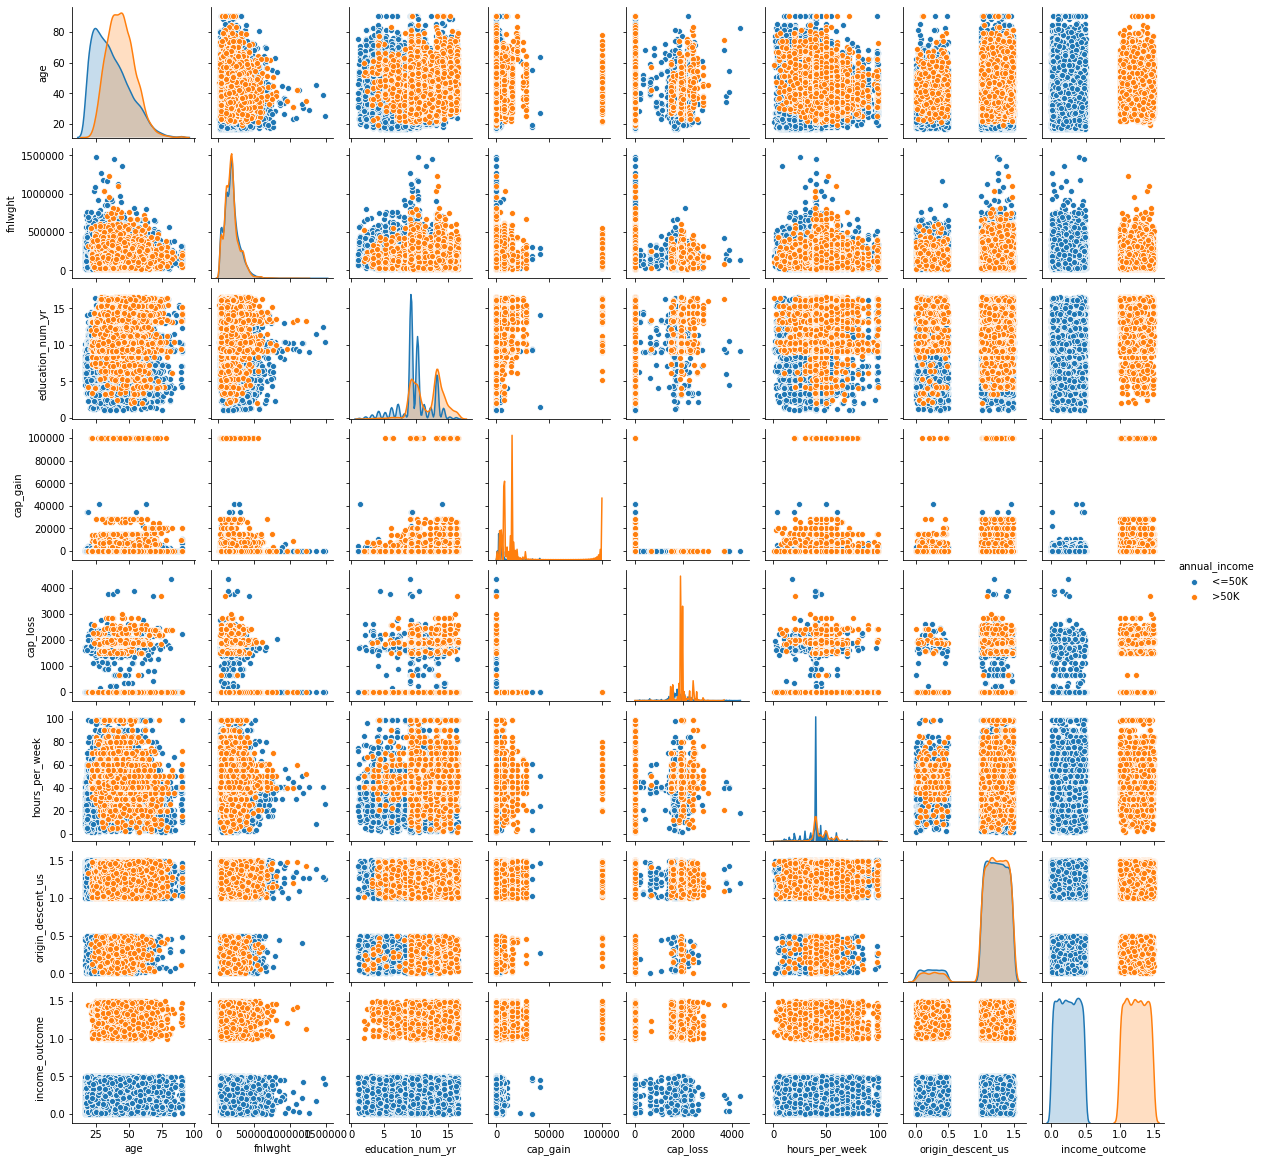

In [45]:
continous_feat_jitter = raw_census_95_data.copy()
continous_feat_jitter['origin_descent_us'] = continous_feat_jitter.origin_descent_us.astype('int64')
continous_feat_jitter['income_outcome'] = continous_feat_jitter.income_outcome.astype('int64')
continous_features_jitter = list(continous_feat_jitter.select_dtypes(include='int64').columns)
continous_feat_jitter[continous_features_jitter] = continous_feat_jitter[continous_features_jitter].values + np.random.rand(len(continous_feat_jitter),8)/2 
sns.pairplot(continous_feat_jitter,hue = 'annual_income', height=2)

Below is a heatmap of continuous variables that shows the correlation between the different attributes. This heatmap can be used to check for multicolinearity. There are no significant correlations between any variables, and thus, no evidence of multicolinearity.

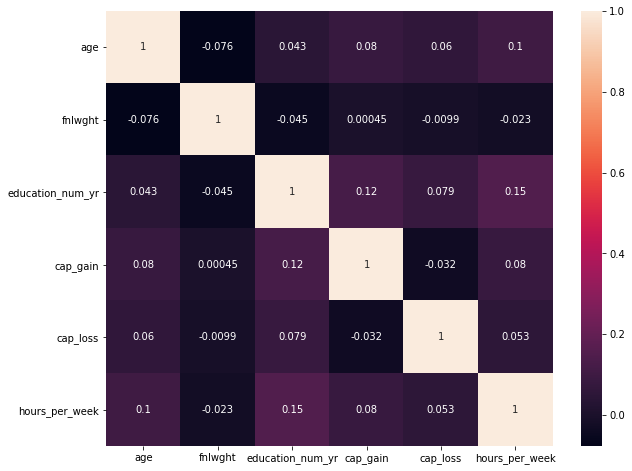

In [47]:
# This heatmap shows the Correlation between the different variables
plt.rcParams['figure.figsize'] = [10,8]
sns.heatmap(raw_census_95_data.corr(), annot = True);

## Interesting Features:
#### *Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

Below, we investigated a series of attributes, identifying which attributes appeared to be a good predictor of *annual_income*.

As we look at *sex* broken out by *annual_income*, it appears visually evident that a greater proportion of males make >$50k than do females.  This is an important relationship to keep in mind as we continue building our classifier.

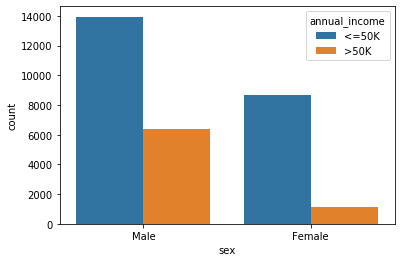

In [90]:
#Age broken out by annual_income
sns.countplot(x="sex", hue="annual_income", data=raw_census_95_data)

One item to note as we examine *workclass* broken out by *annual_income* is that more "self-emp-inc" make over $50k than under which could be useful for our classifier.  However, the number of "self-emp-inc" observations are so small, it's not likely to have a significant impact.

[Text(0, 0, 'State-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Without-pay')]

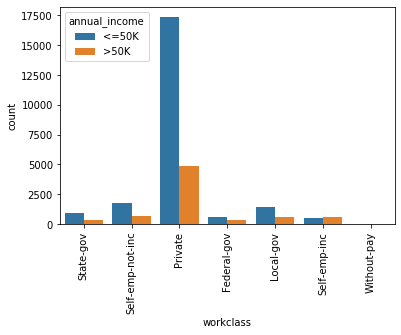

In [91]:
#workclass broken out by annual_income
chart=sns.countplot(x="workclass", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

At this point of the EDA, it appears that *education* will be an important factor for our classifier.  We can see that Bachelors, masters, Doctorate, and Prof-School all have very high proportions making over 50k.  However, like we observed in *workclass*, the cumulative proportion of those attributes may not be significant enough to achieve high accuracy given the number of HS-grad, Some-college, and Assoc-voc observations over 50k.

[Text(0, 0, 'Bachelors'),
 Text(0, 0, 'HS-grad'),
 Text(0, 0, '11th'),
 Text(0, 0, 'Masters'),
 Text(0, 0, '9th'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Assoc-acdm'),
 Text(0, 0, '7th-8th'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, '10th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, '12th'),
 Text(0, 0, '1st-4th')]

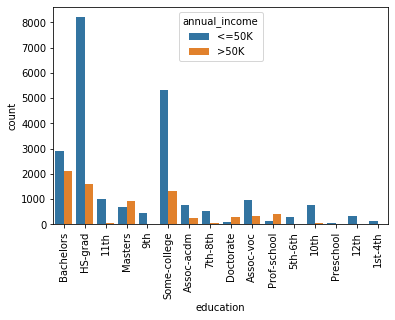

In [92]:
#education broken out by annual_income
chart=sns.countplot(x="education", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Looking at our created categorical variable *education_level* it is unclear if it is more useful than the *education* variable above, but we will keep it to see how it compares when we actually start building a classifier.

[Text(0, 0, 'CGRAD'),
 Text(0, 0, 'HSGRAD'),
 Text(0, 0, 'HS'),
 Text(0, 0, 'PGRAD'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'ASC'),
 Text(0, 0, 'PRIM')]

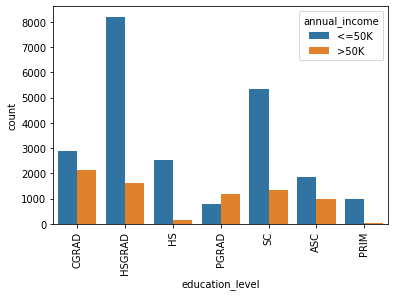

In [99]:
#education_level broken out by annual_income
chart=sns.countplot(x="education_level", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Marital status seems to be an extremely significant indicator of achieving an income over 50k.  The proportion of Married-civ-spouse making over 50k is extremely high compared to the others.

[Text(0, 0, 'Never-married'),
 Text(0, 0, 'Married-civ-spouse'),
 Text(0, 0, 'Divorced'),
 Text(0, 0, 'Married-spouse-absent'),
 Text(0, 0, 'Separated'),
 Text(0, 0, 'Married-AF-spouse'),
 Text(0, 0, 'Widowed')]

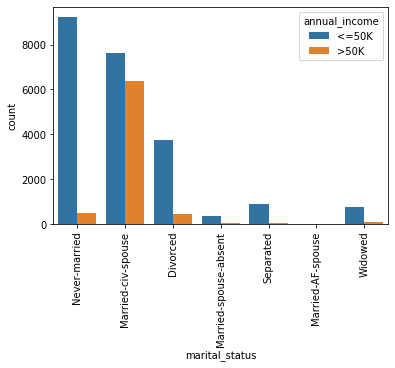

In [93]:
#martial_status broken out by annual_income
chart=sns.countplot(x="marital_status", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

The visualization of relationship below is telling us the same story. Husbands and wives have a proportion close to 50% when it comes to income over 50k.  Including relationship may help our classifier as someone who is a wife has a nearly 50/50 chance of making over 50k.

[Text(0, 0, 'Not-in-family'),
 Text(0, 0, 'Husband'),
 Text(0, 0, 'Wife'),
 Text(0, 0, 'Own-child'),
 Text(0, 0, 'Unmarried'),
 Text(0, 0, 'Other-relative')]

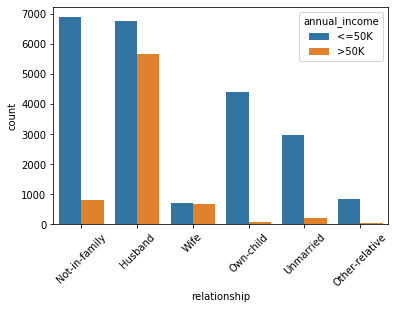

In [94]:
#relationship broken out by annual_income
chart=sns.countplot(x="relationship", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Looking at *race*, the main thing this graph tells us that a majority of the subjects were white.  It does look like Asian-Pac-Islanders have a fairly significant proportion making over $50k, but again, not many observations.

[Text(0, 0, 'White'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Asian-Pac-Islander'),
 Text(0, 0, 'Amer-Indian-Eskimo'),
 Text(0, 0, 'Other')]

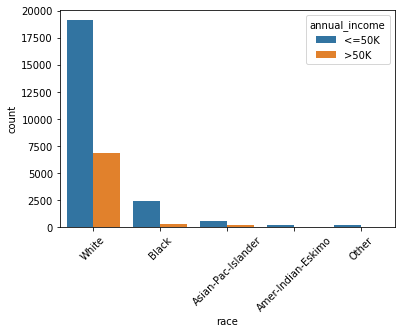

In [95]:
#race broken out by annual_income
chart=sns.countplot(x="race", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Looking at *occupation*, we can see that Exec-managerial, Prof-specialty, protective-serv, and Tech-support have a high poportions of >$50k.

[Text(0, 0, 'Adm-clerical'),
 Text(0, 0, 'Exec-managerial'),
 Text(0, 0, 'Handlers-cleaners'),
 Text(0, 0, 'Prof-specialty'),
 Text(0, 0, 'Other-service'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Transport-moving'),
 Text(0, 0, 'Farming-fishing'),
 Text(0, 0, 'Machine-op-inspct'),
 Text(0, 0, 'Tech-support'),
 Text(0, 0, 'Craft-repair'),
 Text(0, 0, 'Protective-serv'),
 Text(0, 0, 'Armed-Forces'),
 Text(0, 0, 'Priv-house-serv')]

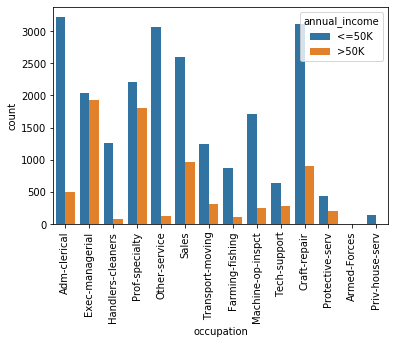

In [96]:
#occupation broken out by annual_income
chart=sns.countplot(x="occupation", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

Looking at our created attribute of *level_of_employ*, we can see that a greater proportion of FT are making more than 50k--a little over a third. It appears that this attribute is usfeul in teasing out a vast majority of those making over 50k.

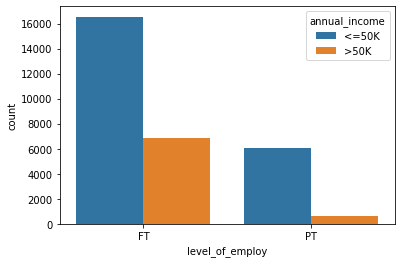

In [97]:
#level_of_employ broken out by annual_income
sns.countplot(x="level_of_employ", hue="annual_income", data=raw_census_95_data)

Grouping *age* into the three bins (*age_range*) doesn't offer a lot of insight, as there are very few seniors and children in the data set, leaving us with the task ot teasing out most of the >50k values from the adult bin.

[Text(0, 0, 'adult'), Text(0, 0, 'senior'), Text(0, 0, 'child')]

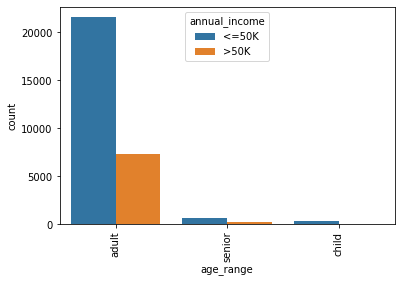

In [98]:
#age_range broken out by annual_income
chart=sns.countplot(x="age_range", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

As we have observed earlier, a vast majority of the observations of *native_country* are from the United States.  Binning it into US or not-US for the attribute *origin_descent_us* helps by grouping the smaller sample size countries together into a more substantial bin to work with. 

[Text(0, 0, '0'), Text(0, 0, '1')]

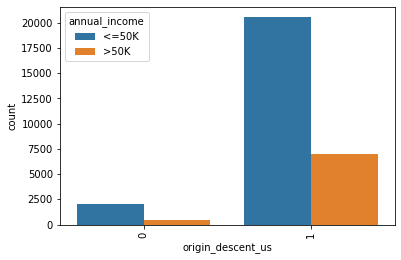

In [100]:
#origin_descent_us broken out by annual_income
chart=sns.countplot(x="origin_descent_us", hue="annual_income", data=raw_census_95_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

It would make sense that those who make more money have more money to invest, and therefore are seeing some sort of capital gains or losses.  We will attempt to see if we can tease out some of those >50k values by binning capital gain values.  Let's see whether or not those with higher capital gains tend to make over 50k.  

Looking at the outcome, we can see that we have almost esclusively >50k for the "yes" values, however we are still left dealing with the majority of >50k values in the "no" bin.  This could still be beneficial for our classifier, as anyone with capitla gains over 7000 would have a very good chance of being classified correctly. 

In [101]:
#Separating by capital gains
raw_census_95_data["bigcap"]=np.where(raw_census_95_data["cap_gain"]>7500,"yes","no")

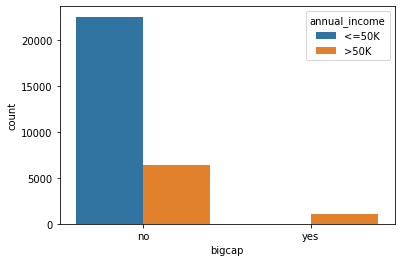

In [102]:
#bigcap broken out by annual_income
sns.countplot(x="bigcap", hue="annual_income", data=raw_census_95_data)

## Exceptional Work:
#### *You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*

We are going to conduct a primary components analysis (PCA) on this data set. To do that, we must first check assumptions.

We can see from the continous densisty plots,there is evidence against normality. *Age* and *Fnlwght* are showing positive skew. *Education_num_year*, *cap_gain*, *cap_loss* and *hours_per_week* all demonstrate multimodal distribtutions.

In [104]:
continous_features = list(raw_census_95_data.select_dtypes(include='int64').columns)

print(continous_features) 

['age', 'fnlwght', 'education_num_yr', 'cap_gain', 'cap_loss', 'hours_per_week']


In [110]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 2
cmap = sns.diverging_palette(220, 10, as_cmap=True)

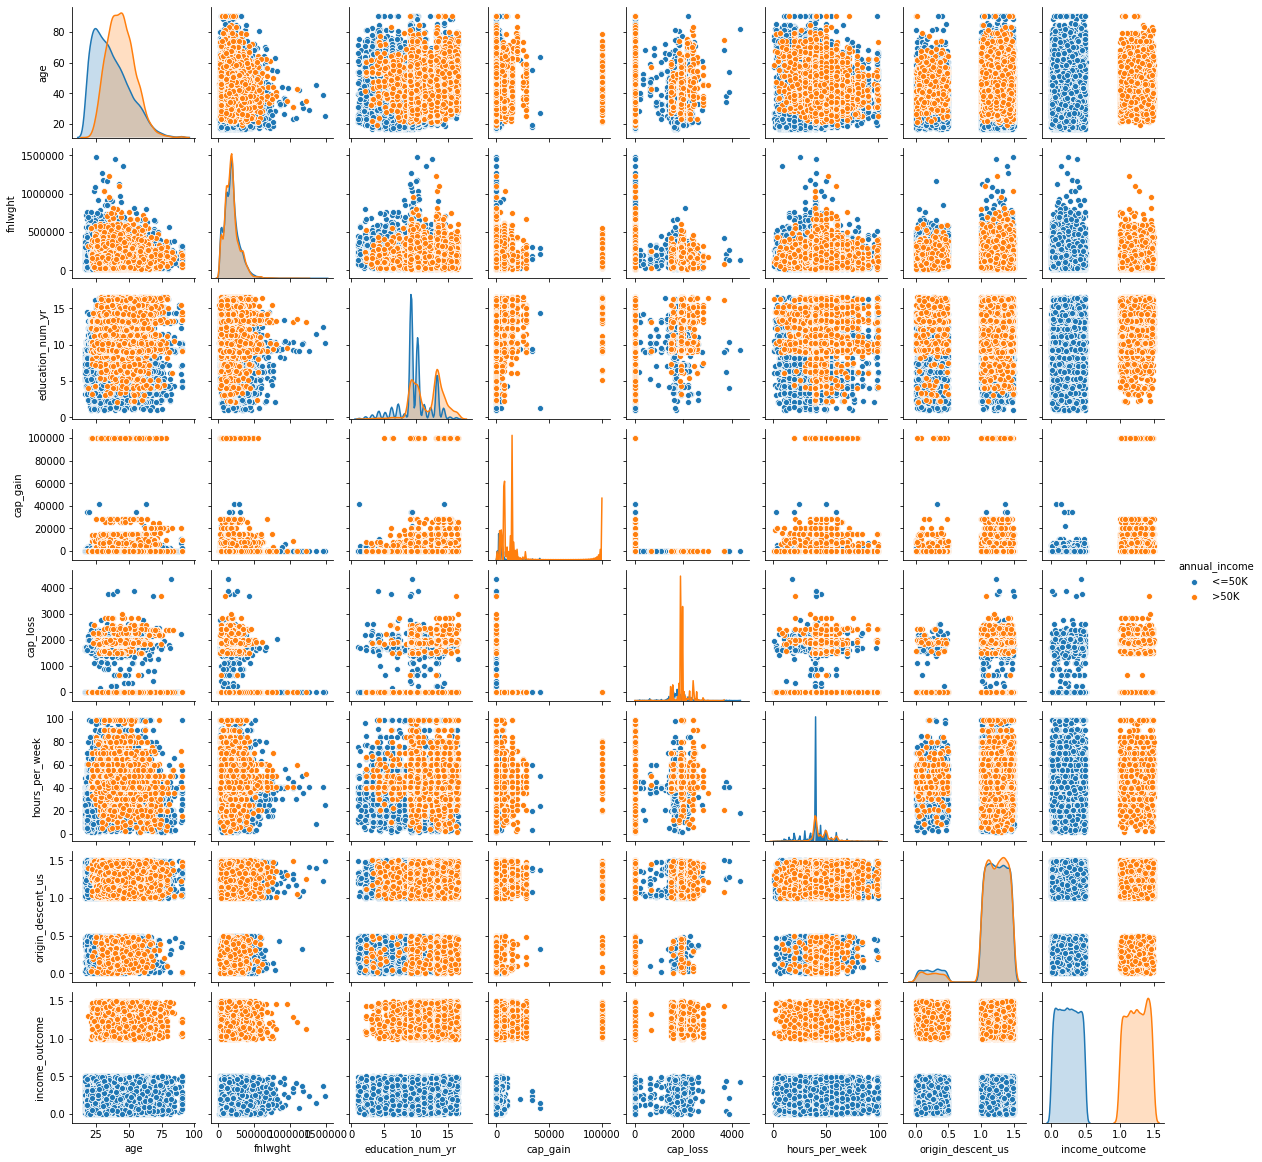

In [108]:
continous_feat_jitter = raw_census_95_data.copy()
continous_feat_jitter['origin_descent_us'] = continous_feat_jitter.origin_descent_us.astype('int64')
continous_feat_jitter['income_outcome'] = continous_feat_jitter.income_outcome.astype('int64')
continous_features_jitter = list(continous_feat_jitter.select_dtypes(include='int64').columns)
continous_feat_jitter[continous_features_jitter] = continous_feat_jitter[continous_features_jitter].values + np.random.rand(len(continous_feat_jitter),8)/2 
sns.pairplot(continous_feat_jitter,hue = 'annual_income', height=2)

In [109]:
print(continous_features)

['age', 'fnlwght', 'education_num_yr', 'cap_gain', 'cap_loss', 'hours_per_week']


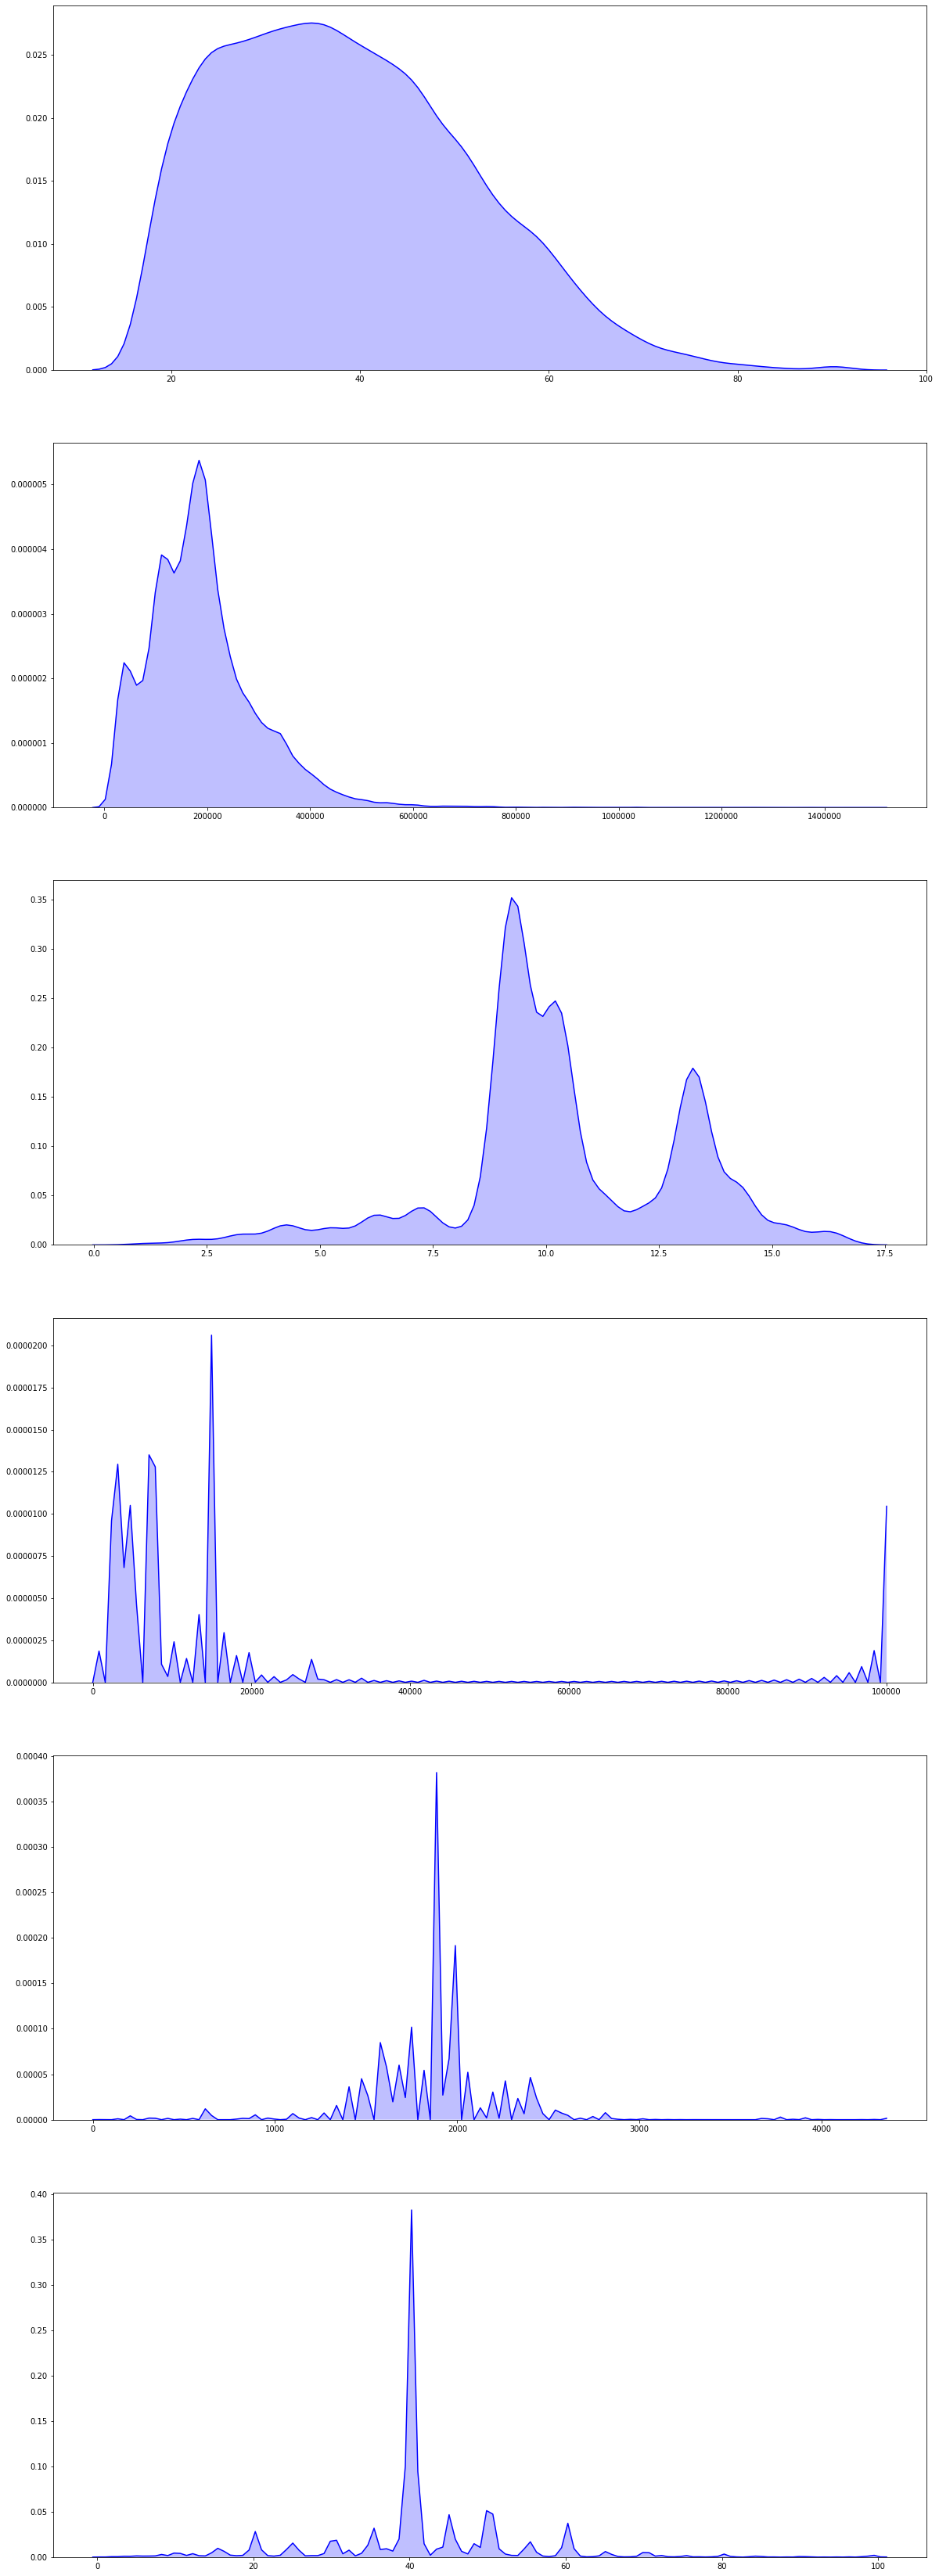

In [111]:
#https://stackoverflow.com/questions/41325160/seaborn-plots-in-a-loop 
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
continous_feat_df = continous_feat_jitter[continous_features]
n=len(continous_feat_df.columns)

fig,ax = plt.subplots(n,1, figsize=(20,n*10), sharex=False)
for i in range(n):
    plt.sca(ax[i])
    col = continous_feat_df.columns[i]
    sns.kdeplot(continous_feat_df[col].values, shade=True, legend = True, color="b")

Going back to our original data set, we see our continous variables are not on the same scale, let's normalize before proceeding with PCA, otherwise we risk the FNLWGHT feature comprising most of the variance as it has large min and max values compared to age and capital gains and loss. 

In [112]:
continous_features_df = raw_census_95_data.copy()
continous_features_df.dtypes
continous_features_df['origin_descent_us'] = continous_features_df.origin_descent_us.astype('int64')
continous_features_df['income_outcome'] = continous_features_df.income_outcome.astype('int64')
continous_features_df_list  = list(continous_features_df.select_dtypes(include='int64').columns)
continous_features_df_list.remove('income_outcome')

In [113]:
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = continous_features_df[continous_features_df_list], continous_features_df.income_outcome

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)


# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2))
std_clf.fit(X_train, y_train)

pca_std = std_clf.named_steps['pca']

scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

#print(pca_std.components_)

In [114]:
continous_features_df[continous_features_df_list].columns

Index(['age', 'fnlwght', 'education_num_yr', 'cap_gain', 'cap_loss',
       'hours_per_week', 'origin_descent_us'],
      dtype='object')

We see even after scaling the continous features, we do not have clear seperation between those who make less than 50K (black dots) and those who make more than 50K (white dots) in the training data set. And there is clear bleed over between the classes. We could generate a more balanced data set through upsampling, but we will run the risk of overfitting the principal components to the training data set. We will want to build models that will include the categorical features.

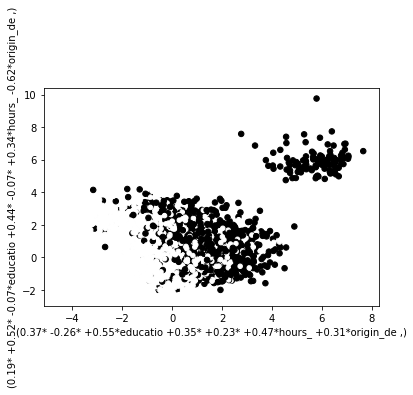

<Figure size 432x288 with 0 Axes>

In [115]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 3
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-8])
        tmp_array.append(tmp_string)
    return tmp_array
  

pca_weight_strings = get_feature_names_from_weights(pca_std.components_,continous_features_df[continous_features_df_list].columns) 



df_pca = pd.DataFrame(X_train_std_transformed,columns=[pca_weight_strings])


ax = df_pca.plot.scatter(df_pca.columns.values[0], df_pca.columns.values[1], c=y_train, s=(y_train+2)*10)
newfig = plt.figure()


The below code changes the *income_outcome* attribute into a numeric value for prediction, and confirms the change by listing the data types of our attributes.

In [117]:
sk_learn_data_set = raw_census_95_data.copy()
sk_learn_data_set['income_outcome'] = sk_learn_data_set.income_outcome.astype('int64')
sk_learn_data_set.dtypes

age                   int64
workclass            object
fnlwght               int64
education            object
education_num_yr      int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
cap_gain              int64
cap_loss              int64
hours_per_week        int64
native_country       object
annual_income        object
origin_descent       object
origin_descent_us    object
income_outcome        int64
level_of_employ      object
age_range            object
education_level      object
bigcap               object
dtype: object

We see from the earlier mosiac plots, the following catagorical features have the largest shifts in proportion of those who make 50K and those who make less than 50K:

*workclass*, *martial_status*, *education*, *occupation*, *sex*, *origin_descent*, *level_of_employ*

We will put these into a vector called *features_of_interest*.

In [120]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace
#https://www.debuggex.com/cheatsheet/regex/python
features_of_interest = ['workclass', 'marital_status','occupation', 'relationship', 'sex','origin_descent_us', 'level_of_employ', 'education_level']

The below code transforms each level of the *features_of_interest* into a separate column with a boolean value to be used for prediction.

In [121]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4 
#https://stackoverflow.com/questions/48810726/concatenate-pandas-dataframes-generated-with-a-loop
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
tmp_cont = []
for feat in features_of_interest: 
    tmp_df = pd.get_dummies(sk_learn_data_set[feat],prefix=str(feat))
    tmp_cont.append(tmp_df)
    feat_df = pd.concat(tmp_cont,axis=1)

ml_df = pd.concat([sk_learn_data_set,feat_df], axis=1)

ml_df.dtypes.unique()


array([dtype('int64'), dtype('O'), dtype('uint8')], dtype=object)

The below code confirms that we have transformed the data, both in type and number of columns.

In [122]:
ml_df = ml_df.select_dtypes(include=['int64','uint8'])

In [123]:
list(ml_df.columns.unique())


['age',
 'fnlwght',
 'education_num_yr',
 'cap_gain',
 'cap_loss',
 'hours_per_week',
 'income_outcome',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital_status_Divorced',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationsh

In [124]:
ml_df.head(n=5)

,age,fnlwght,education_num_yr,cap_gain,cap_loss,hours_per_week,income_outcome,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,origin_descent_us_1,level_of_employ_FT,level_of_employ_PT,education_level_ASC,education_level_CGRAD,education_level_HS,education_level_HSGRAD,education_level_PGRAD,education_level_PRIM,education_level_SC
0,39,77516,13,2174,0,40,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [125]:
ml_df.dtypes

age                                     int64
fnlwght                                 int64
education_num_yr                        int64
cap_gain                                int64
cap_loss                                int64
hours_per_week                          int64
income_outcome                          int64
workclass_Federal-gov                   uint8
workclass_Local-gov                     uint8
workclass_Private                       uint8
workclass_Self-emp-inc                  uint8
workclass_Self-emp-not-inc              uint8
workclass_State-gov                     uint8
workclass_Without-pay                   uint8
marital_status_Divorced                 uint8
marital_status_Married-AF-spouse        uint8
marital_status_Married-civ-spouse       uint8
marital_status_Married-spouse-absent    uint8
marital_status_Never-married            uint8
marital_status_Separated                uint8
marital_status_Widowed                  uint8
occupation_Adm-clerical           

The below code establishes that we will do three iterations of the model with varying parameters for cross-validation. Additionally, our train/test split will be 80/20.

In [126]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit

ML_std_clf = StandardScaler()
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 



num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


The below code runs the logistic regression and varies some parameters, as well as displaying the results. Based on our initial criteria for a successful model, we will choose Iteration 2 because it has the highest level of accuracy at 85.8%, and thus has the lowest misclassification rate.

In [127]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt



lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.8500415627597673
confusion matrix
 [[4192  316]
 [ 586  921]]
====Iteration 1  ====
accuracy 0.8498753117206983
confusion matrix
 [[4231  302]
 [ 601  881]]
====Iteration 2  ====
accuracy 0.8586866167913549
confusion matrix
 [[4238  309]
 [ 541  927]]
